<center><font size=6> Employee Attrition Prediction (Austin Retention Audit) </font></center>

## Team Members:
* Adriana Cruz
* Tyler Gannon
* Drew Hebert
* Chad Trudgeon

## Data Source:
https://catalog.data.gov/dataset/2024-citywide-retention-audit-employee-survey-results

## Data Dictionary

* **Survey Response Number**: Response_number
* **How many years have you worked for the City?**: Between 1 and 5 years, More than 15 years, 6 to 10 years, 11 to 15 years, Less than a year
* **Have you ever transferred departments within the City?**: Yes, No (there are two "No" modifiers in the dataset)
* AltQ3A_ Additional career advancement opportunities *(to be dropped due to lack of data)*
* AltQ3B_ Attractive retention incentives in the new department *(to be dropped due to lack of data)*
* AltQ3C_ Better compensation/salary *(to be dropped due to lack of data)*
* AltQ3D_ Better management/ co-workers/ department culture *(to be dropped due to lack of data)*
* AltQ3E_ Dissatisfaction with how I was treated in my previous department *(to be dropped due to lack of data)*
* AltQ3F_ More opportunities for telework/ flexible work hours *(to be dropped due to lack of data)*
* **I intend to be working for the City 1 year from now**: Extremely Likely, Likely, Neutral, Unlikely, Extremely Unlikely
* **I intend to be working for the City 5 years from now**: Extremely Likely, Likely, Neutral, Unlikely, Extremely Unlikely
* **I intend to retire from the City**: Extremely Likely, Likely, Neutral, Unlikely, Extremely Unlikely
* **Since becoming a City of Austin employee, when was the last time you applied for a job outside the City?**: I have not applied for any jobs outside the City, Over 6 months ago, 3 months to 6 months ago, Within the past 3 months
* **Benefits (including insurance, vacation, etc.)**: Absolutely Essential, Very Important, Neither Important Nor Unimportant, Of Little Importance, Not Important At All
* **Career advancement opportunities**: Absolutely Essential, Very Important, Neither Important Nor Unimportant, Of Little Importance, Not Important At All
* **Commitment to public service**: Absolutely Essential, Very Important, Neither Important Nor Unimportant, Of Little Importance, Not Important At All
* **Compensation/salary**: Absolutely Essential, Very Important, Neither Important Nor Unimportant, Of Little Importance, Not Important At All
* **Fair and equitable treatment**: Absolutely Essential, Very Important, Neither Important Nor Unimportant, Of Little Importance, Not Important At All
* **Management/ co-workers/ department culture**: Absolutely Essential, Very Important, Neither Important Nor Unimportant, Of Little Importance, Not Important At All
* **Retirement/ pension**: Absolutely Essential, Very Important, Neither Important Nor Unimportant, Of Little Importance, Not Important At All
* **Telework/ flexible work hours**: Absolutely Essential, Very Important, Neither Important Nor Unimportant, Of Little Importance, Not Important At All
* **Do the training and development opportunities offered by your department improve your desire to stay with the City?**: Yes, No, I am unaware of any training or development opportunities offered by my department.
* **Do the training and development opportunities offered by the City improve your desire to stay with the City?**: Yes, No, I am unaware of any training or development opportunities offered the City.
* **I am satisfied with my current work/life balance**: Strongly Agree, Agree, Neutral, Disagree, Strongly Disagree
* **I feel valued by my management**: Strongly Agree, Agree, Neutral, Disagree, Strongly Disagree
* **I would recommend my department to a friend**: Strongly Agree, Agree, Neutral, Disagree, Strongly Disagree
* **I would recommend the City as an employer to a friend**: Strongly Agree, Agree, Neutral, Disagree, Strongly Disagree
* **What Department are you with?**: 72 departments
* **Does the retention program offered by your department improve your desire to stay with the City? Retention program refers to any monetary incentives added to base pay**: Yes, No, I am not aware, I am not eligible


## Importing necessary libraries

In [1]:
# libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as pyplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# library to split data
from sklearn.model_selection import train_test_split

# libraries to encode the variables
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler

# importing the metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# importing grid search and random search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# importing tensorflow library
import tensorflow as tf

# importing keras library and tuner
from tensorflow import keras

# importing different functions to build models
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential

# importing backend
from tensorflow.keras import backend

# library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
survey = pd.read_csv('/content/drive/MyDrive/ML Project/Datasets to Consider/Austin Retention Audit/2024_Citywide_Retention_Audit_-_Employee_Survey_Results (1).csv')


In [4]:
# checking the number of rows and columns in the data
survey.shape

(6523, 29)

The dataset has 6523 rows and 29 columns

In [5]:
# 1. Lowercase and strip column names
survey.columns = [col.lower().strip() for col in survey.columns]

# 2. Lowercase and strip string values
survey = survey.applymap(lambda x: x.lower().strip() if isinstance(x, str) else x)

## Data Overview

In [6]:
# viewing the first 5 rows of the data
survey.head()

,survey response number,q1_how many years have you worked for the city?,q2_have you ever transferred departments within the city?,altq3a_ additional career advancement opportunities,altq3b_ attractive retention incentives in the new department,altq3c_ better compensation/salary,altq3d_ better management/ co-workers/ department culture,altq3e_ dissatisfaction with how i was treated in my previous department,altq3f_ more opportunities for telework/ flexible work hours,q4a_i intend to be working for the city 1 year from now.,...,q6g_retirement/ pension,q6h_telework/ flexible work hours,q7_do the training and development opportunities offered by your department improve your desire to stay with the city?,q8_do the training and development opportunities offered by the city improve your desire to stay with the city?,q9a_i am satisfied with my current work/life balance.,q9b_i feel valued by my management.,q9c_i would recommend my department to a friend.,q9d_i would recommend the city as an employer to a friend.,q10_what department are you with?,q11_does the retention program offered by your department improve your desire to stay with the city? retention program refers to any monetary incentives added to base pay.
0,1,between 1 and 5 years,"no, i have not transferred between city depart...",NaN,NaN,NaN,NaN,NaN,NaN,extremely likely,...,absolutely essential,absolutely essential,i am unaware of any training or development op...,i am unaware of any training or development op...,strongly disagree,strongly agree,neutral,agree,transportation and public works,i am not aware of any retention programs offer...
1,2,less than a year,"no, i have not transferred between city depart...",NaN,NaN,NaN,NaN,NaN,NaN,extremely likely,...,absolutely essential,absolutely essential,no,no,strongly agree,agree,agree,strongly agree,i prefer not to disclose,NaN
2,3,more than 15 years,"no, i have not transferred between city depart...",NaN,NaN,NaN,NaN,NaN,NaN,extremely likely,...,absolutely essential,absolutely essential,yes,yes,neutral,agree,agree,agree,austin 3-1-1,NaN
3,4,more than 15 years,"yes, i have transferred between city departments.",absolutely essential,absolutely essential,absolutely essential,absolutely essential,neither important nor unimportant,not important at all,extremely likely,...,absolutely essential,very important,i am unaware of any training or development op...,i am unaware of any training or development op...,agree,strongly disagree,neutral,neutral,forensic science department,NaN
4,5,less than a year,"no, i have not transferred between city depart...",NaN,NaN,NaN,NaN,NaN,NaN,likely,...,absolutely essential,absolutely essential,yes,yes,neutral,neutral,neutral,neutral,austin water,yes


In [7]:
# checking the datatypes of the columns in the dataset
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6523 entries, 0 to 6522
Data columns (total 29 columns):
 #   Column                                                                                                                                                                       Non-Null Count  Dtype 
---  ------                                                                                                                                                                       --------------  ----- 
 0   survey response number                                                                                                                                                       6523 non-null   int64 
 1   q1_how many years have you worked for the city?                                                                                                                              6523 non-null   object
 2   q2_have you ever transferred departments within the city?                           

* All of the columns are of the object datatype.
* There are some null values

In [8]:
# checking for duplicate values in the data
survey.duplicated().sum()

np.int64(0)

* There are no duplicate values

In [9]:
# drop the "alt" questions which are primarily null
survey = survey.drop(columns=[col for col in survey.columns if col.startswith("alt")])
# drop "survey response number" which is irrelevant
survey = survey.drop(columns=['survey response number'])

In [10]:
# rename the columns
rename_dict = {
    "q1_how many years have you worked for the city?": "years_worked_for_city",
    "q2_have you ever transferred departments within the city?": "transferred_departments",
    "q4a_i intend to be working for the city 1 year from now.": "intention_one_year",
    "q4b_i intend to be working for the city 5 years from now.": "intention_five_year",
    "q4c_i intend to retire from the city.": "intention_retire",
    "q5_since becoming a city of austin employee, when was the last time you applied for a job outside the city?": "applied_for_other_job",
    "q6a_benefits (including insurance, vacation, etc.)": "benefits",
    "q6b_career advancement opportunities": "career_advancement",
    "q6c_commitment to public service": "public_service_commitment",
    "q6d_compensation/salary": "compensation",
    "q6e_fair and equitable treatment": "fair_treatment",
    "q6f_management/ co-workers/ department culture": "culture",
    "q6g_retirement/ pension": "retirement_pension",
    "q6h_telework/ flexible work hours": "telework",
    "q7_do the training and development opportunities offered by your department improve your desire to stay with the city?": "desire_to_stay_department",
    "q8_do the training and development opportunities offered by the city improve your desire to stay with the city?": "desire_to_stay_city_job",
    "q9a_i am satisfied with my current work/life balance.": "work_life_balance",
    "q9b_i feel valued by my management.": "feel_valued",
    "q9c_i would recommend my department to a friend.": "recommend_department",
    "q9d_i would recommend the city as an employer to a friend.": "recommend_city_job",
    "q10_what department are you with?": "department",
    "q11_does the retention program offered by your department improve your desire to stay with the city? retention program refers to any monetary incentives added to base pay.": "retention_program"
}

survey = survey.rename(columns=rename_dict)


In [11]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6523 entries, 0 to 6522
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   years_worked_for_city      6523 non-null   object
 1   transferred_departments    6523 non-null   object
 2   intention_one_year         6523 non-null   object
 3   intention_five_year        6523 non-null   object
 4   intention_retire           6523 non-null   object
 5   applied_for_other_job      6523 non-null   object
 6   benefits                   6523 non-null   object
 7   career_advancement         6523 non-null   object
 8   public_service_commitment  6523 non-null   object
 9   compensation               6523 non-null   object
 10  fair_treatment             6523 non-null   object
 11  culture                    6523 non-null   object
 12  retirement_pension         6523 non-null   object
 13  telework                   6523 non-null   object
 14  desire_t

In [12]:
# checking the missing values in the data
survey.isnull().sum()

,0
years_worked_for_city,0
transferred_departments,0
intention_one_year,0
intention_five_year,0
intention_retire,0
applied_for_other_job,0
benefits,0
career_advancement,0
public_service_commitment,0
compensation,0


* Question 11 has 2785 null values

In [13]:
# replace the nulls in retention_program with 'unknown'.
survey['retention_program'] = survey['retention_program'].astype('object').fillna('unknown')

In [14]:
# checking the dependent variable percentages
survey['intention_one_year'].value_counts(1)

,proportion
intention_one_year,
extremely likely,0.516174
likely,0.253564
neutral,0.121110
extremely unlikely,0.054729
unlikely,0.054423


In [15]:
# checking the number of unique values in each column
survey.nunique()

,0
years_worked_for_city,5
transferred_departments,3
intention_one_year,5
intention_five_year,5
intention_retire,5
applied_for_other_job,4
benefits,5
career_advancement,5
public_service_commitment,5
compensation,5


In [16]:
for i in survey.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(survey[i].value_counts())
    print("*" * 50)

Unique values in years_worked_for_city are :
years_worked_for_city
between 1 and 5 years    1934
more than 15 years       1582
6 to 10 years            1530
11 to 15 years            868
less than a year          609
Name: count, dtype: int64
**************************************************
Unique values in transferred_departments are :
transferred_departments
no, i have not transferred between city departments. i also have not applied to a job in another department while at my current department.    3307
yes, i have transferred between city departments.                                                                                              1656
no, i have not transferred between city departments. however, i have applied to a job in another department while at my current department.    1560
Name: count, dtype: int64
**************************************************
Unique values in intention_one_year are :
intention_one_year
extremely likely      3367
likely                1654

In [17]:
# clean up verbose answers, make them concise

# define the mappings for each column
transferred_departments_map = {
    "no, i have not transferred between city departments. i also have not applied to a job in another department while at my current department.": "no",
    "no, i have not transferred between city departments. however, i have applied to a job in another department while at my current department.": "no",
    "yes, i have transferred between city departments.": "yes"
}

desire_to_stay_department_map = {
    "i am unaware of any training or development opportunities offered by my department.": "unaware of opportunities"
}

desire_to_stay_city_job_map = {
    "i am unaware of any training or development opportunities offered the city.": "unaware of opportunities"
}

retention_program_map = {
    "i am not aware of any retention programs offered by my department.": "i am not aware",
    "i am not eligible for my department's retention program.": "i am not eligible"
}

# apply the mappings
survey["transferred_departments"] = survey["transferred_departments"].replace(transferred_departments_map)
survey["desire_to_stay_department"] = survey["desire_to_stay_department"].replace(desire_to_stay_department_map)
survey["desire_to_stay_city_job"] = survey["desire_to_stay_city_job"].replace(desire_to_stay_city_job_map)
survey["retention_program"] = survey["retention_program"].replace(retention_program_map)

In [18]:
# grouping rare departments
threshold = 30
dept_counts = survey['department'].value_counts()
rare_depts = dept_counts[dept_counts < threshold].index
survey['department'] = survey['department'].replace(rare_depts, 'other')


### Define Attrition
For the purpose model building, we will define 'Attrition' using the Intention to Stay 1 Year field as follows
* Yes:  'intention_one_year' = neutral, unlikely, extremely unlikely
* No: 'intention_one_year' = likely, extremely likely

Since the cost of a false negative is so high, we will err on the side of caution and include 'unknown' as Yes.

In [19]:
# add attrition field
survey['attrition'] = survey['intention_one_year'].map(
    lambda x: 'No' if str(x).strip().lower() in ['likely', 'extremely likely'] else 'Yes'
)

## Exploratory Data Analysis

### Univariate Analysis

In [20]:
# assign order to the categories for display in plots
def apply_ordered_categories(survey):
    intent_order = [
        'extremely unlikely', 'unlikely', 'neutral', 'likely', 'extremely likely'
    ]
    importance_order = [
        'not important at all', 'of little importance',
        'neither important nor unimportant', 'very important', 'absolutely essential'
    ]
    agreement_order = [
        'strongly disagree', 'disagree', 'neutral', 'agree', 'strongly agree'
    ]
    years_order = [
        'less than a year', 'between 1 and 5 years', '6 to 10 years',
        '11 to 15 years', 'more than 15 years'
    ]

    # Intentions
    for col in ['intention_one_year', 'intention_five_year', 'intention_retire']:
        survey[col] = pd.Categorical(survey[col], categories=intent_order, ordered=True)

    # Importance fields
    importance_fields = [
        'benefits', 'career_advancement', 'public_service_commitment',
        'compensation', 'fair_treatment', 'culture',
        'retirement_pension', 'telework'
    ]
    for col in importance_fields:
        survey[col] = pd.Categorical(survey[col], categories=importance_order, ordered=True)

    # Agreement fields
    agreement_fields = [
        'work_life_balance', 'feel_valued', 'recommend_department', 'recommend_city_job'
    ]
    for col in agreement_fields:
        survey[col] = pd.Categorical(survey[col], categories=agreement_order, ordered=True)

    # Years worked
    survey['years_worked_for_city'] = pd.Categorical(survey['years_worked_for_city'], categories=years_order, ordered=True)

    return survey

In [21]:
# apply order
survey = apply_ordered_categories(survey)

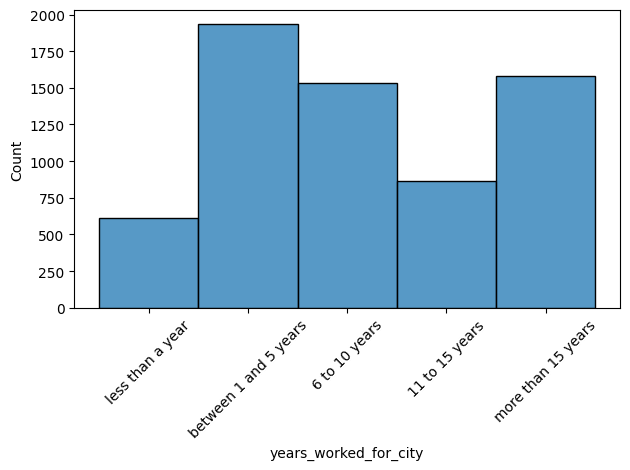

In [22]:
sns.histplot(survey, x='years_worked_for_city')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

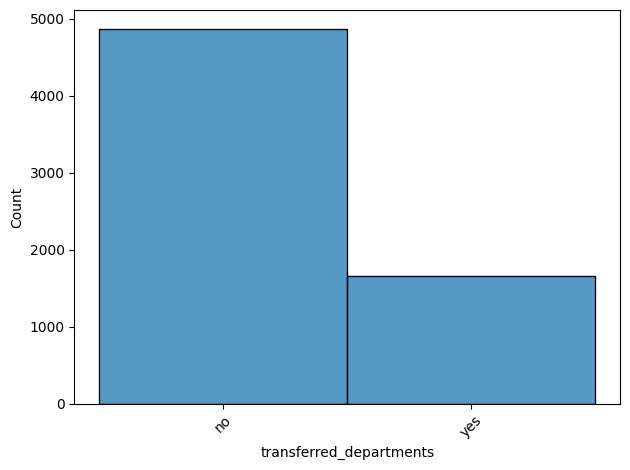

In [23]:
sns.histplot(survey, x='transferred_departments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

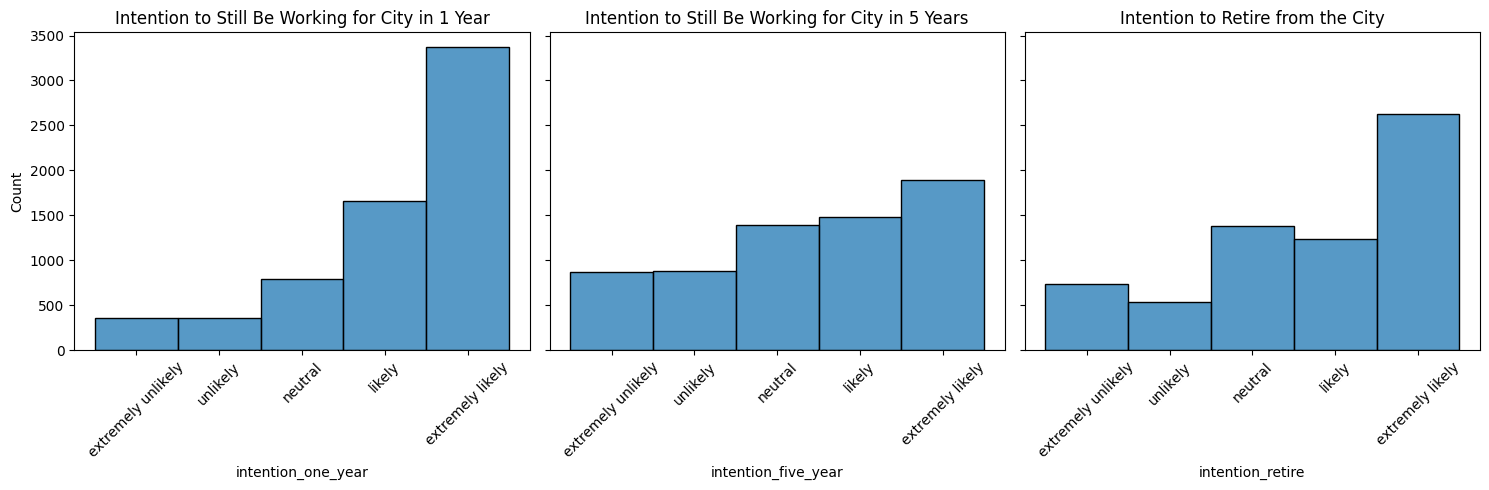

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# First plot: Intention to Work 1 Year
sns.histplot(survey, x='intention_one_year', ax=axes[0])
axes[0].set_title('Intention to Still Be Working for City in 1 Year')
axes[0].tick_params(axis='x', rotation=45)

# Second plot: Intention to Work 5 Years
sns.histplot(survey, x='intention_five_year', ax=axes[1])
axes[1].set_title('Intention to Still Be Working for City in 5 Years')
axes[1].tick_params(axis='x', rotation=45)

# Third plot: Intention to Retire from the City
sns.histplot(survey, x='intention_retire', ax=axes[2])
axes[2].set_title('Intention to Retire from the City')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

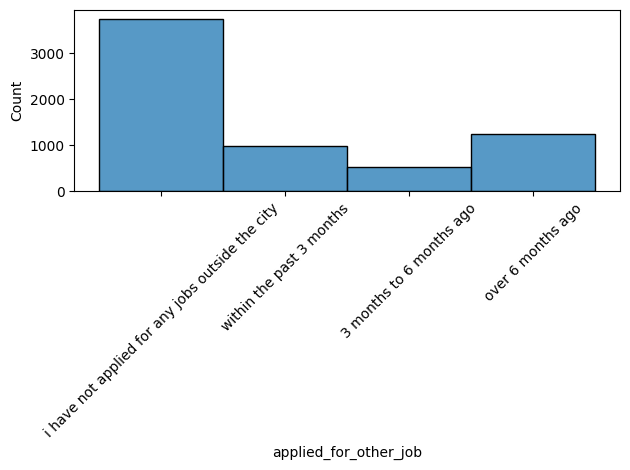

In [25]:
sns.histplot(survey, x='applied_for_other_job')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

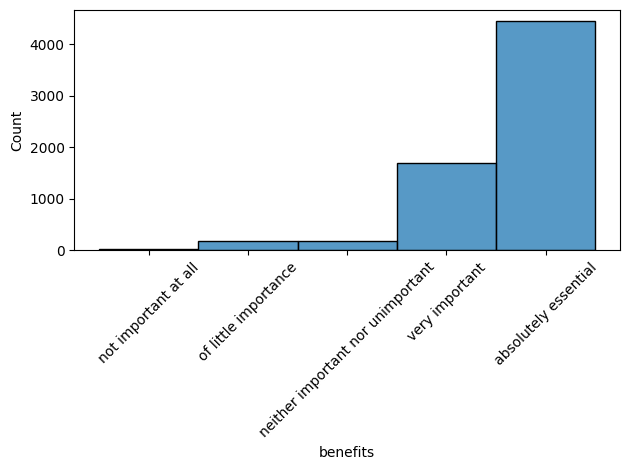

In [26]:
sns.histplot(survey, x='benefits')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

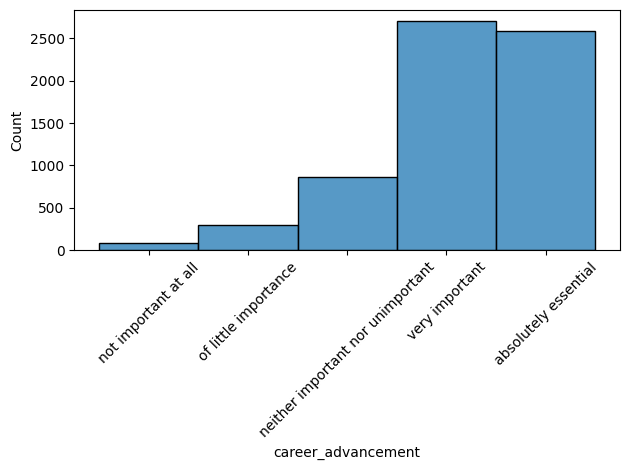

In [27]:
sns.histplot(survey, x='career_advancement')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

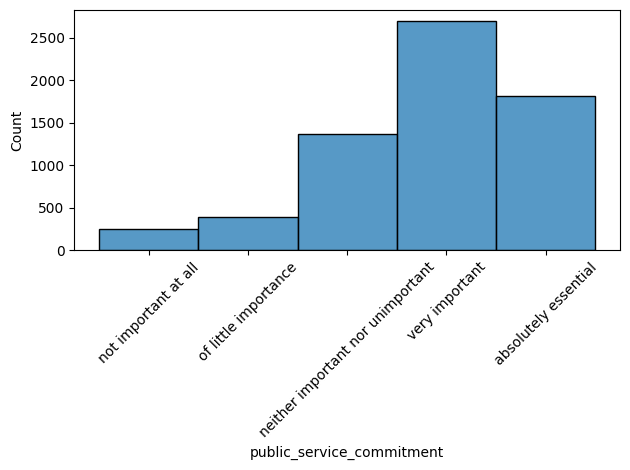

In [28]:
sns.histplot(survey, x='public_service_commitment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

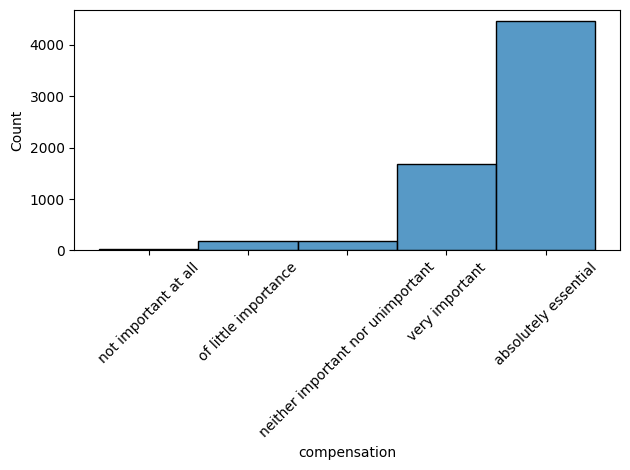

In [29]:
sns.histplot(survey, x='compensation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

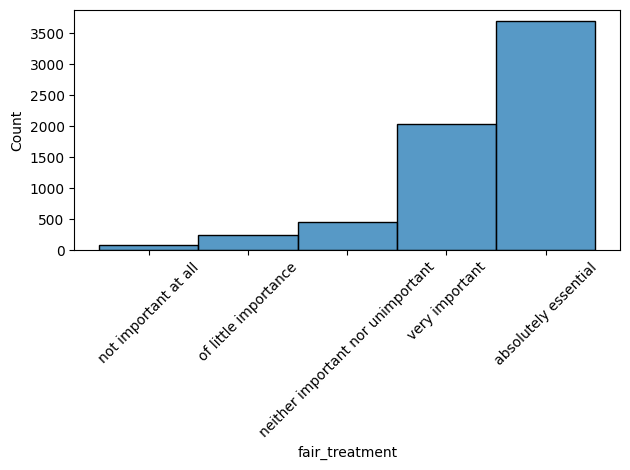

In [30]:
sns.histplot(survey, x='fair_treatment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

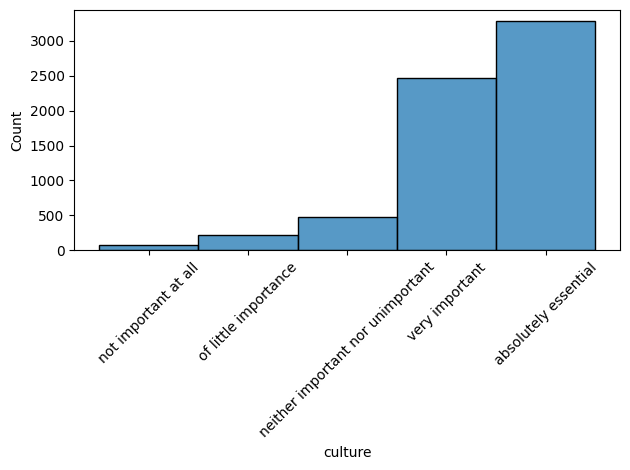

In [31]:
sns.histplot(survey, x='culture')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

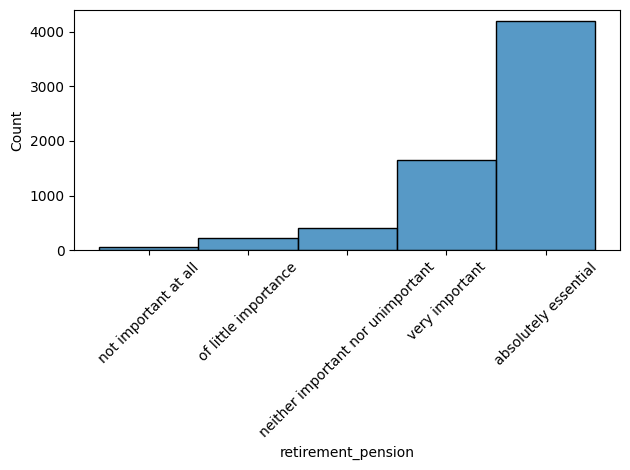

In [32]:
sns.histplot(survey, x='retirement_pension')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

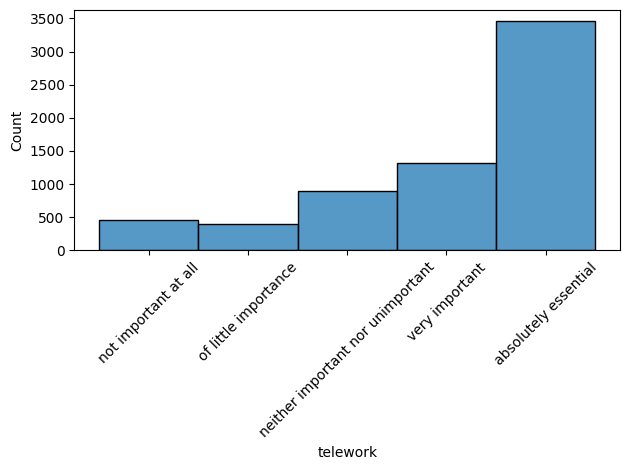

In [33]:
sns.histplot(survey, x='telework')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

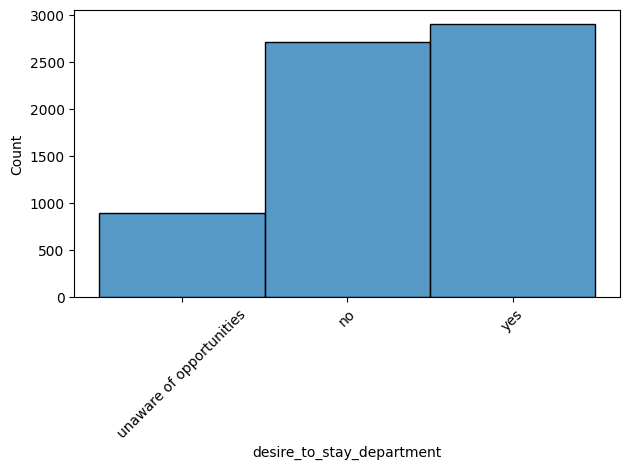

In [34]:
sns.histplot(survey, x='desire_to_stay_department')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

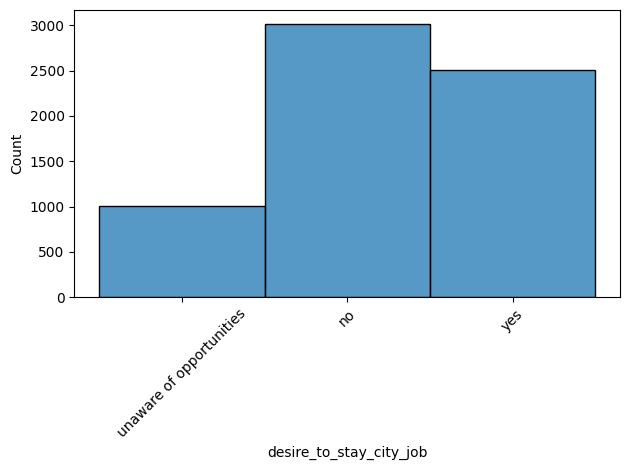

In [35]:
sns.histplot(survey, x='desire_to_stay_city_job')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

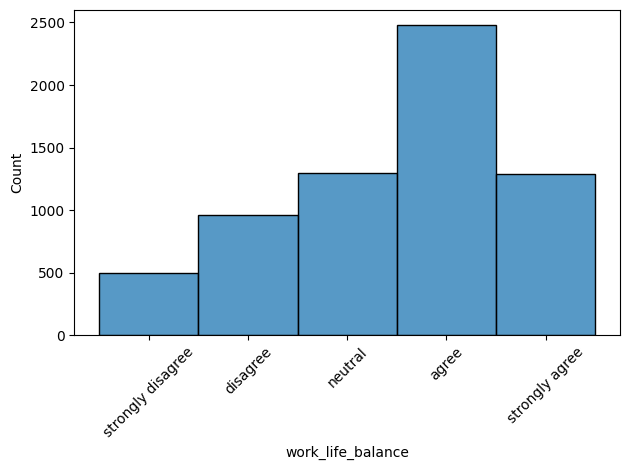

In [36]:
sns.histplot(survey, x='work_life_balance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

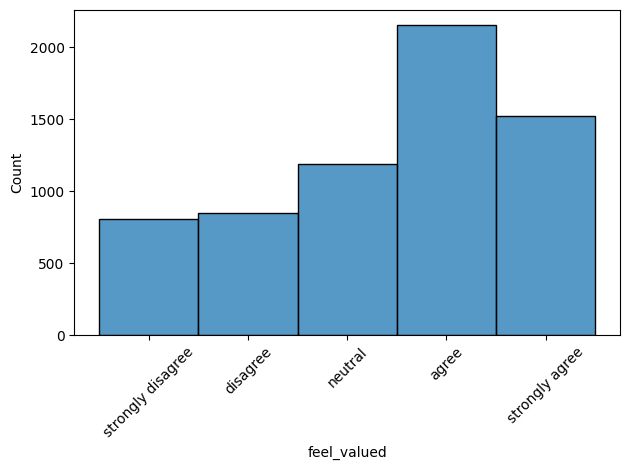

In [37]:
sns.histplot(survey, x='feel_valued')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

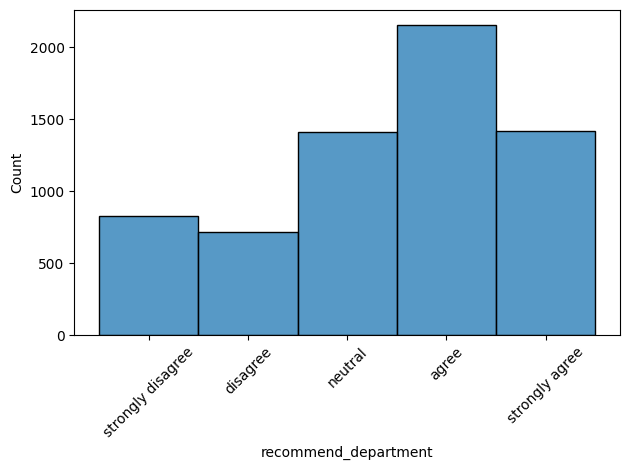

In [38]:
sns.histplot(survey, x='recommend_department')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

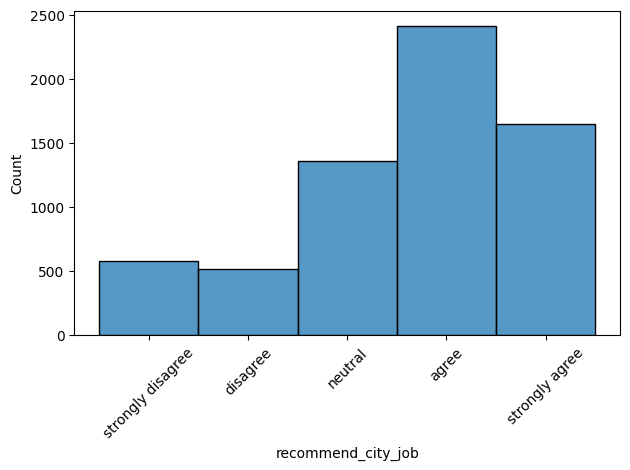

In [39]:
sns.histplot(survey, x='recommend_city_job')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

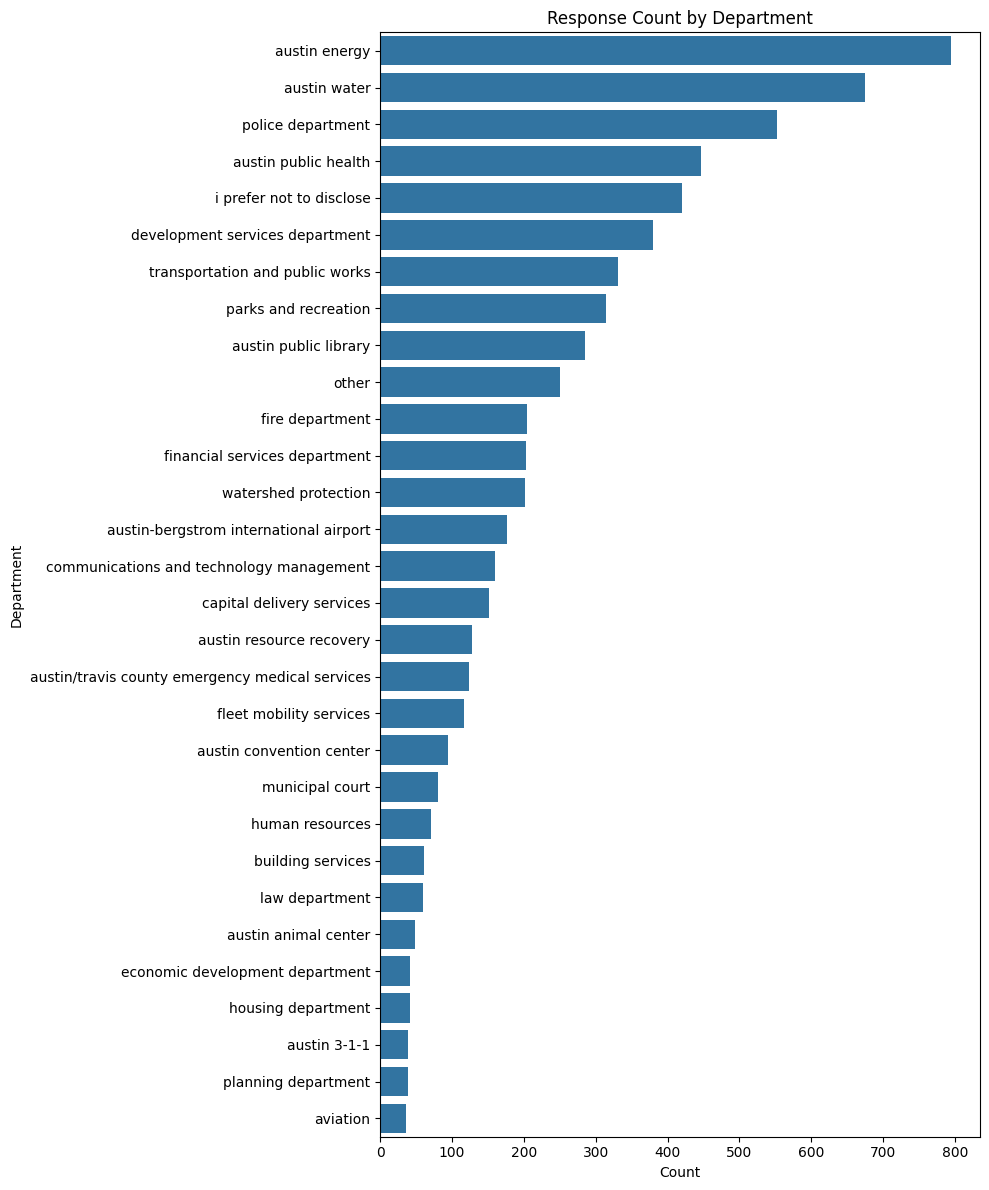

In [40]:
plt.figure(figsize=(10, 12))

sns.countplot(data=survey, y='department', order=survey['department'].value_counts().index)

plt.title('Response Count by Department')
plt.xlabel('Count')
plt.ylabel('Department')
plt.tight_layout()
plt.show()

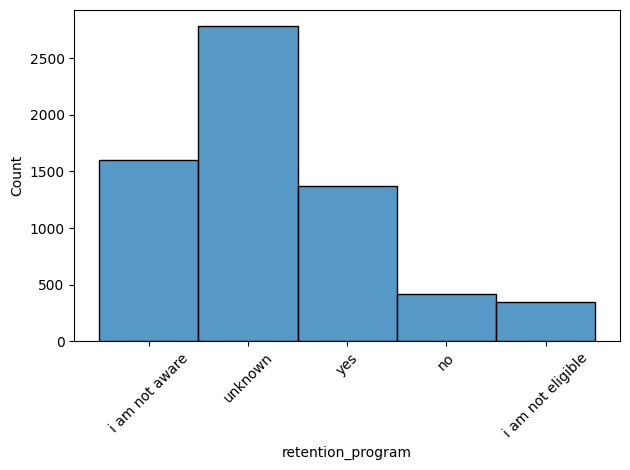

In [41]:
sns.histplot(survey, x='retention_program')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

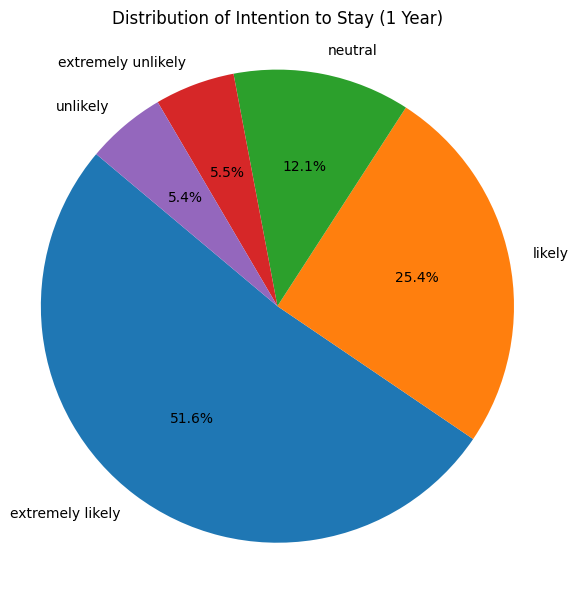

In [42]:
plt.figure(figsize=(6, 6))
intention_counts = survey['intention_one_year'].value_counts()
plt.pie(intention_counts, labels=intention_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Intention to Stay (1 Year)')
plt.axis('equal')
plt.tight_layout()
plt.show()

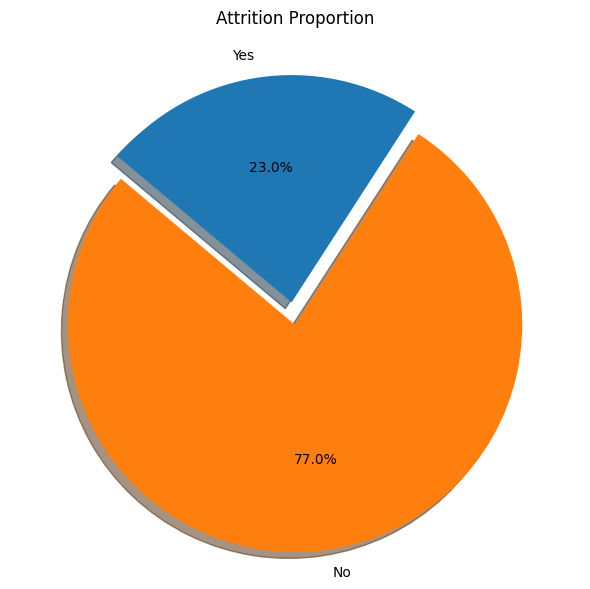

In [43]:
# Count responses based on the 'attrition' field
attrition_counts = survey['attrition'].value_counts()

# Updated custom colors to match the uploaded image
custom_colors = {
    'Yes': '#1f77b4',  # Blue for "Yes"
    'No': '#ff7f0e'     # Orange for "No"
}
colors = [custom_colors[label] for label in attrition_counts.index]

# Define explode to highlight "Yes"
# The 'Yes' category will be exploded (separated) in the pie chart
explode = [0.1 if label == 'Yes' else 0 for label in attrition_counts.index]

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    attrition_counts,
    labels=attrition_counts.index,
    colors=colors,
    autopct='%1.1f%%',
    explode=explode,
    startangle=140,
    shadow=True
)
plt.title('Attrition Proportion', pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()


### Bivariate Analysis

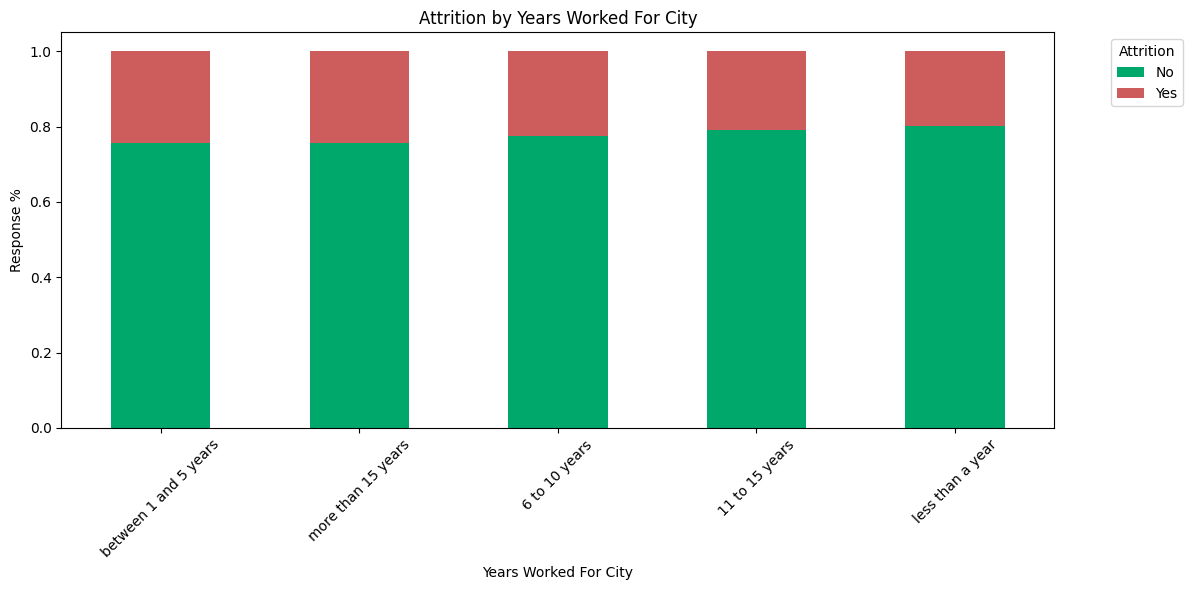

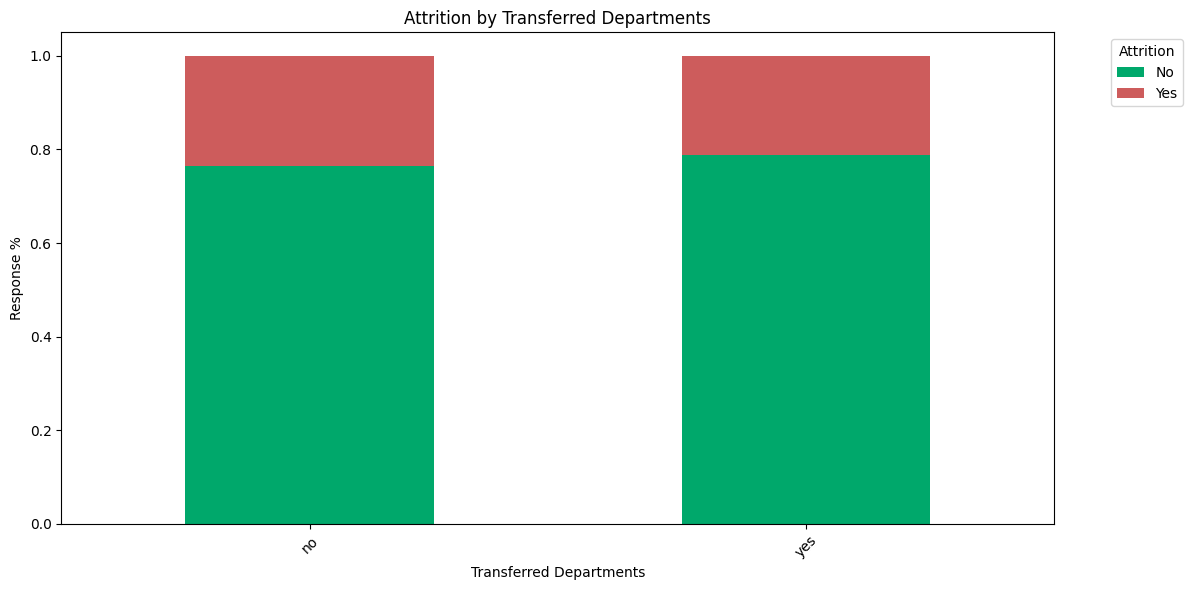

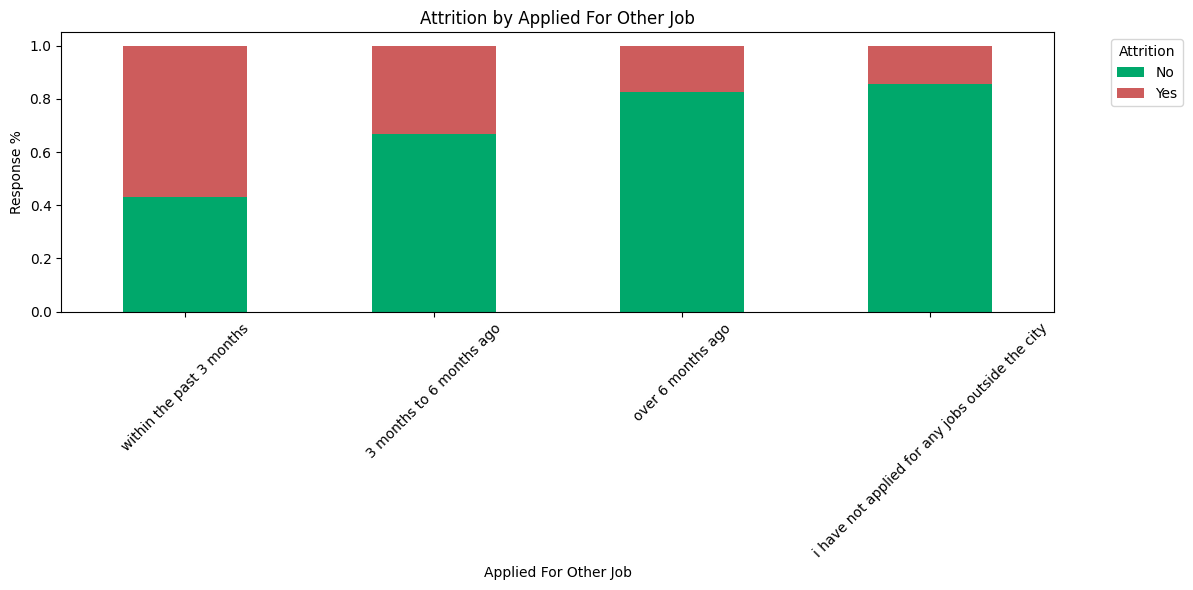

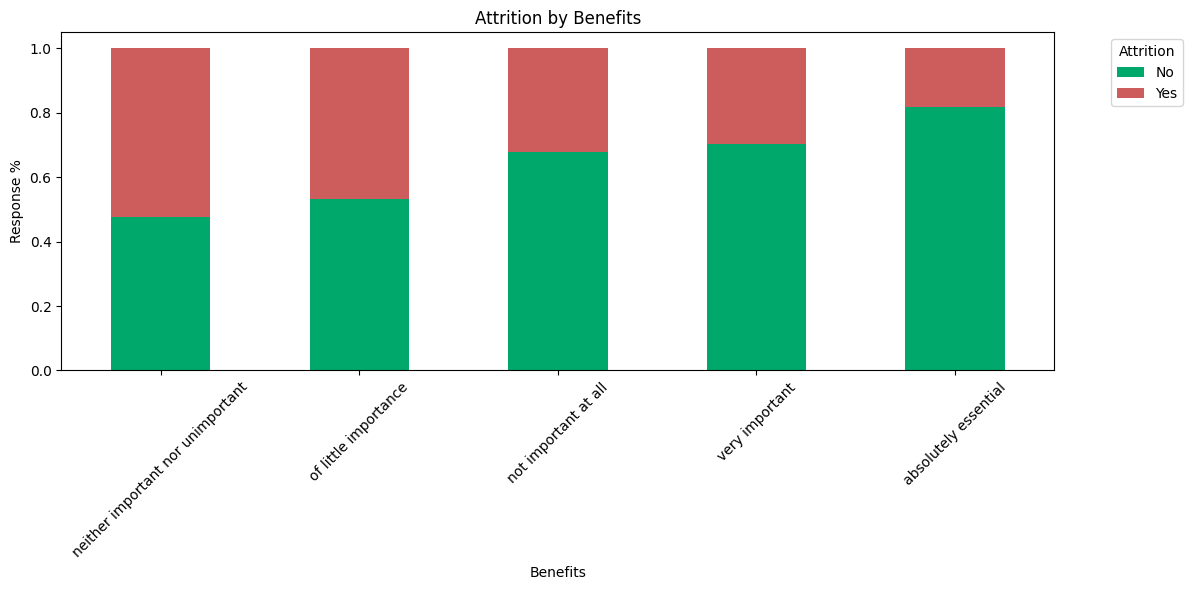

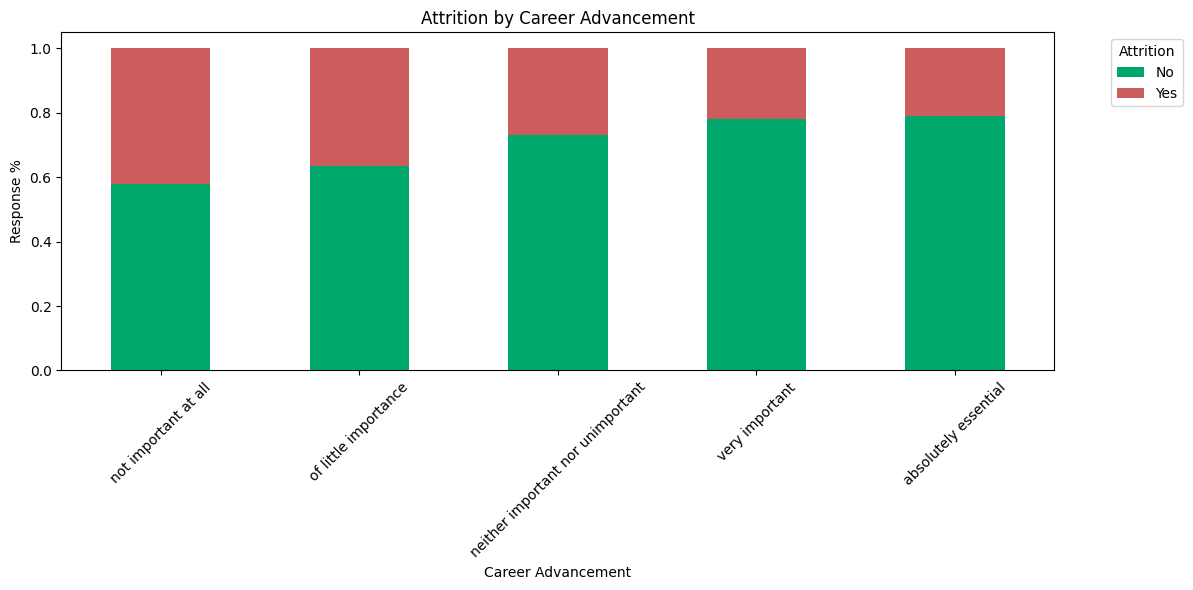

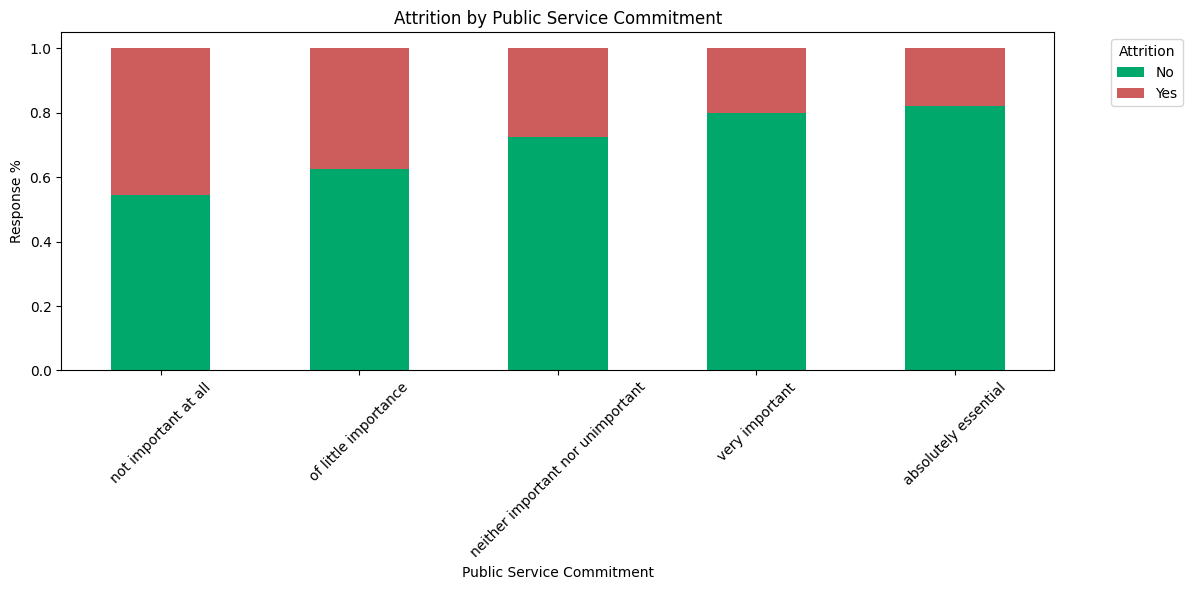

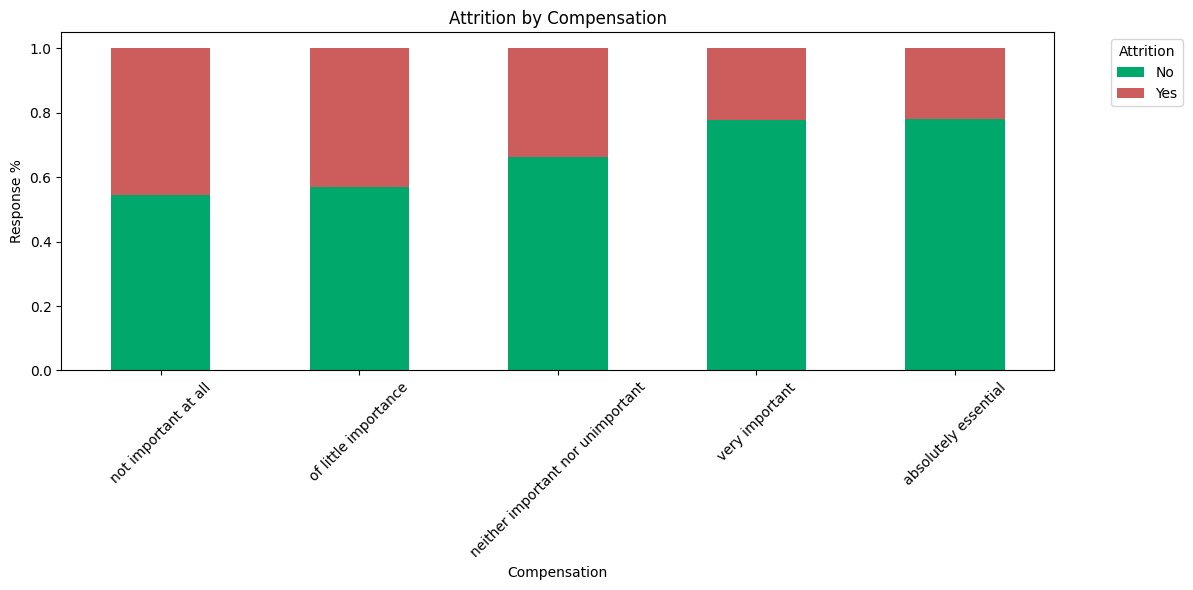

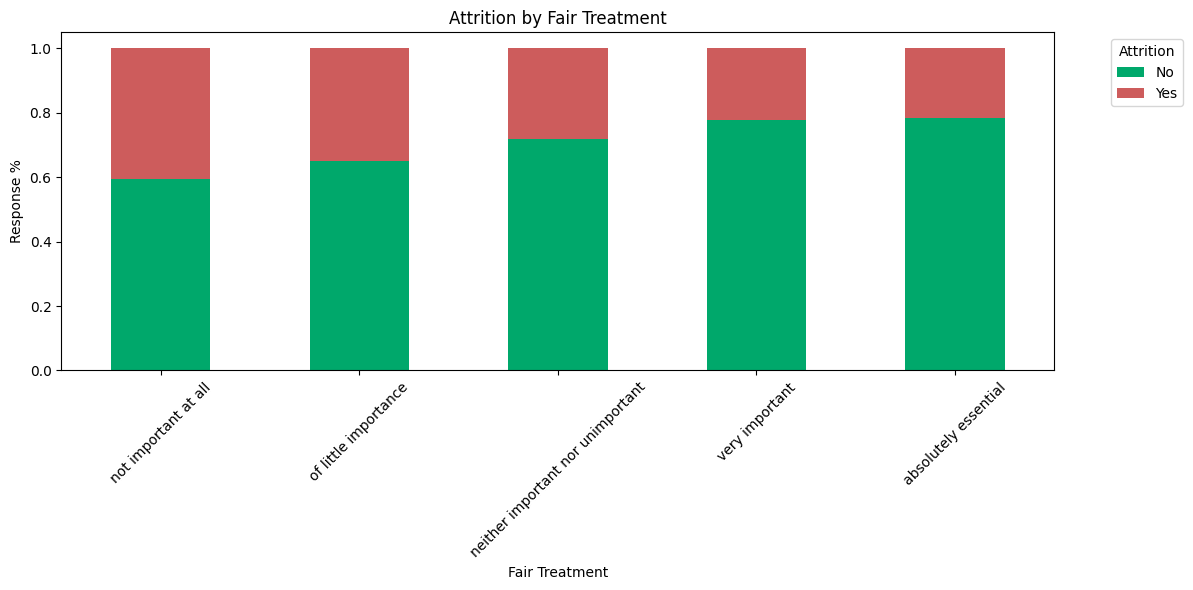

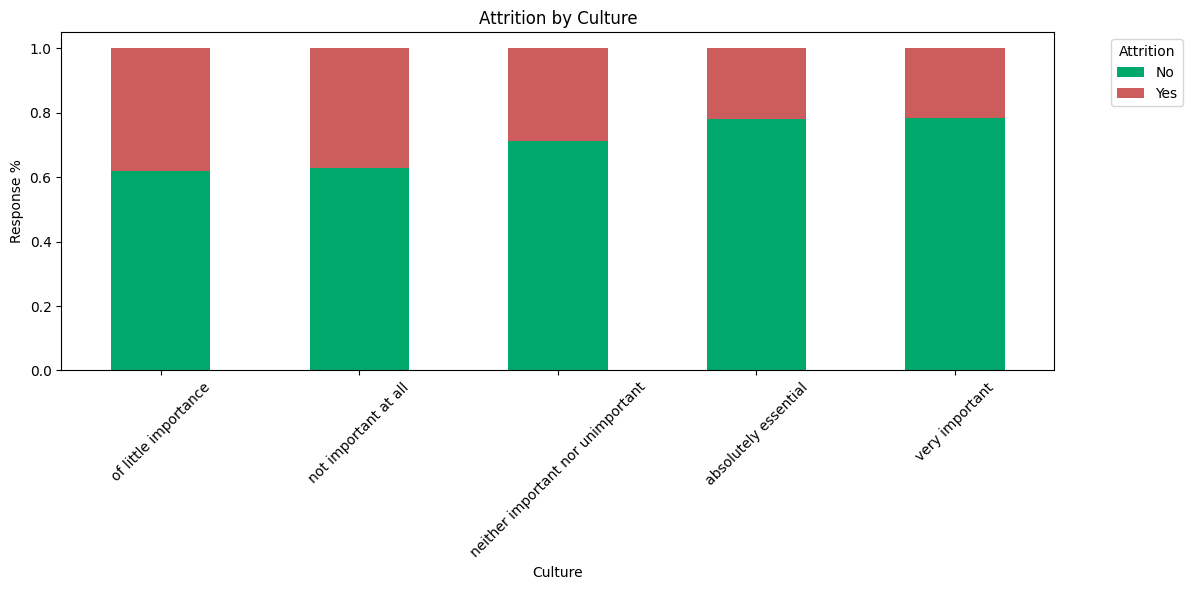

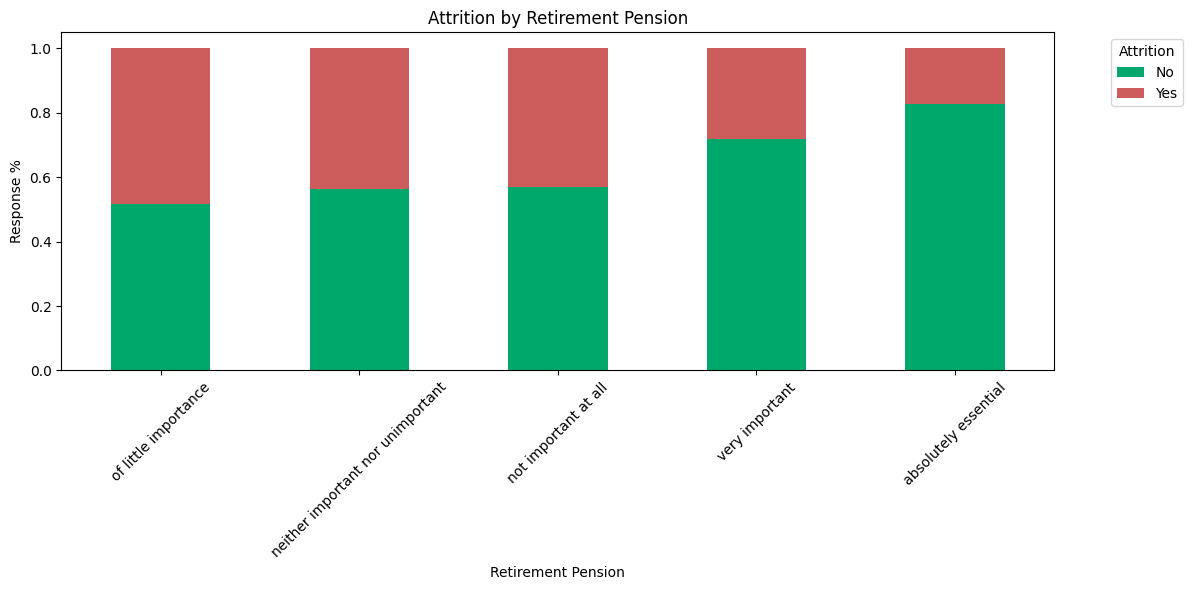

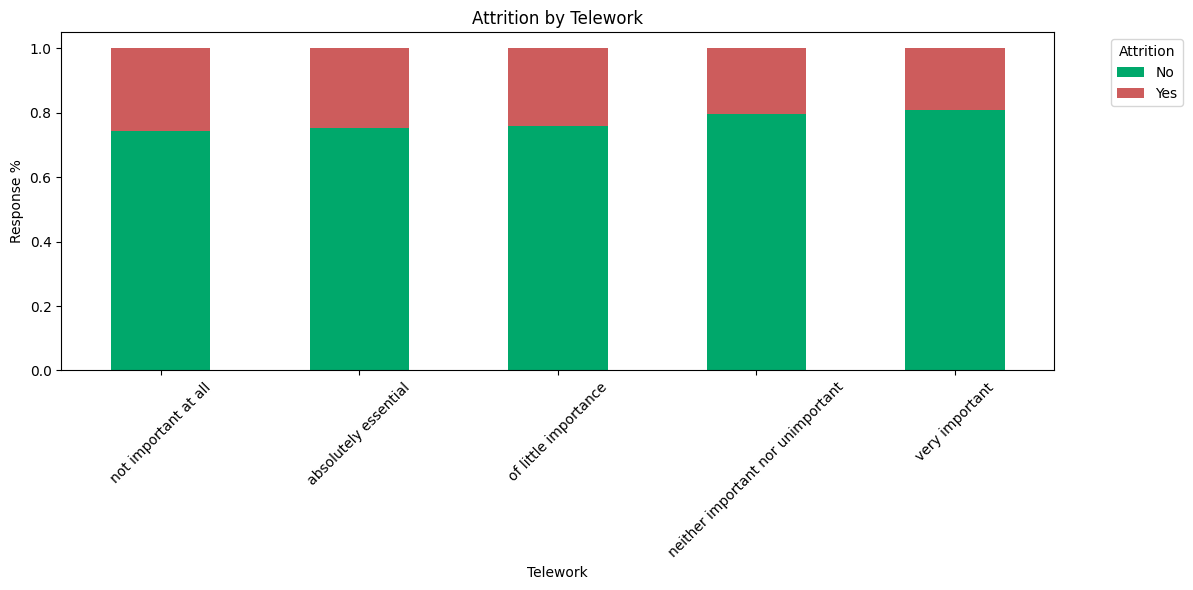

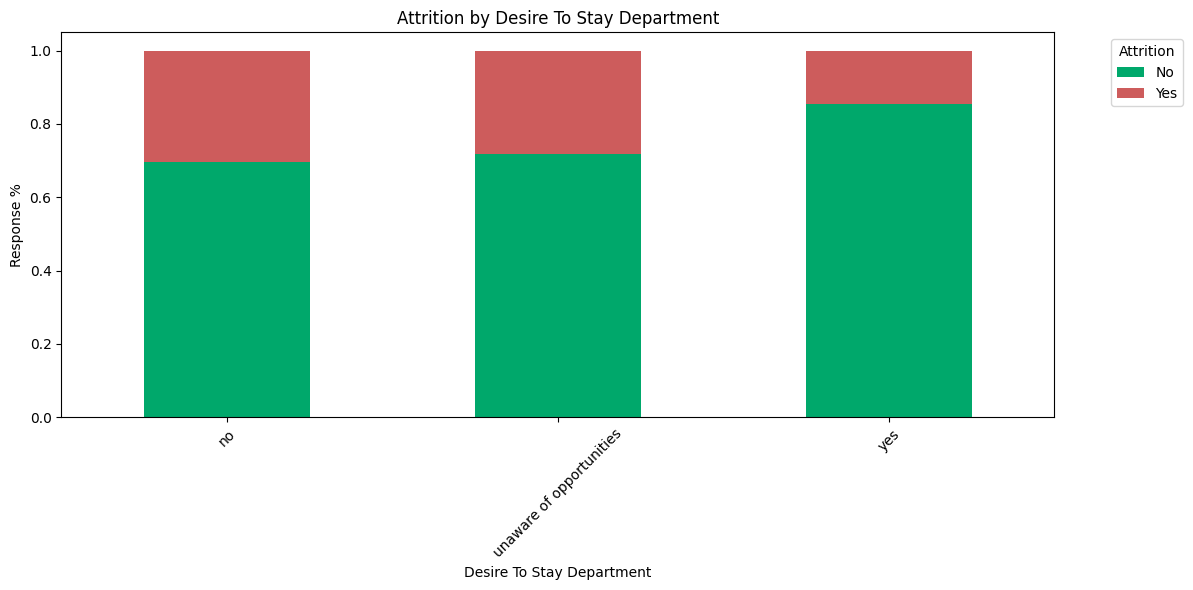

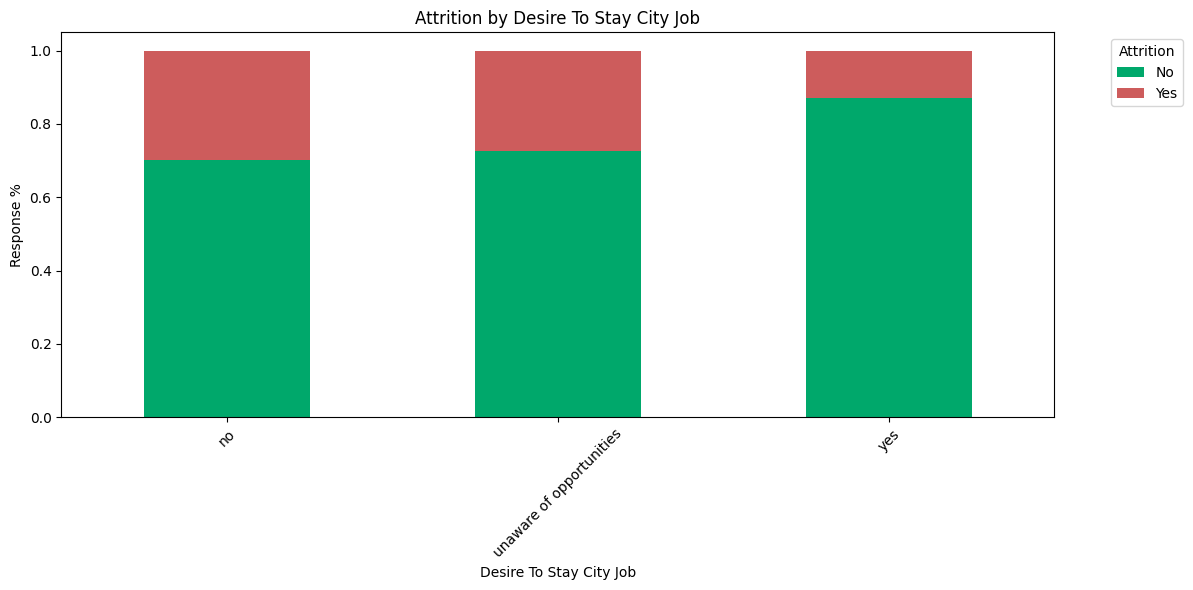

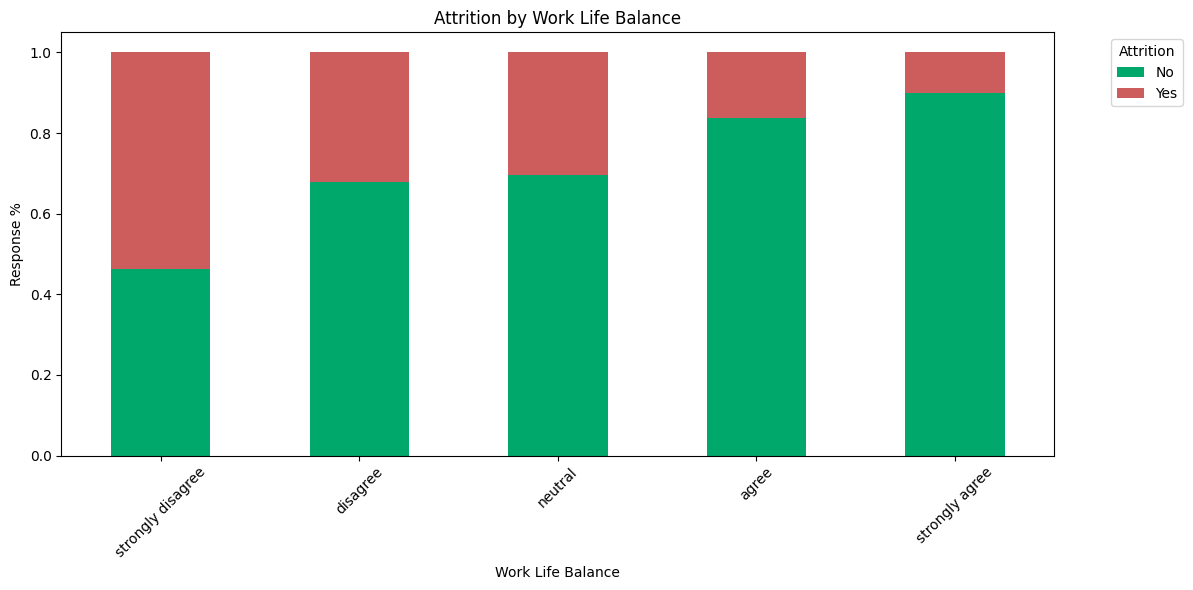

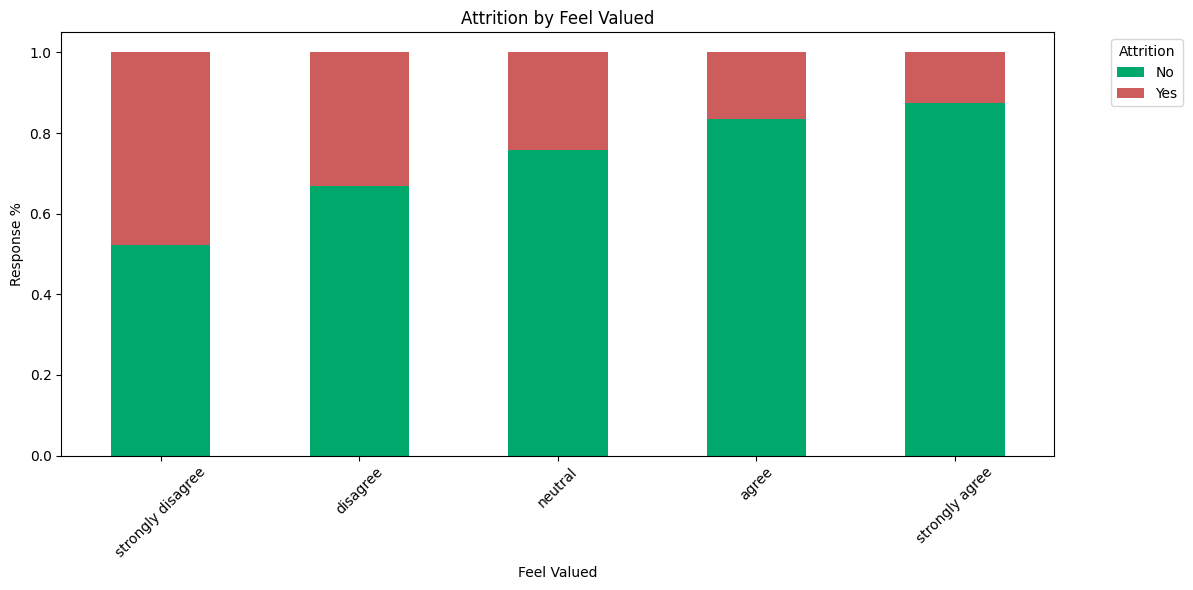

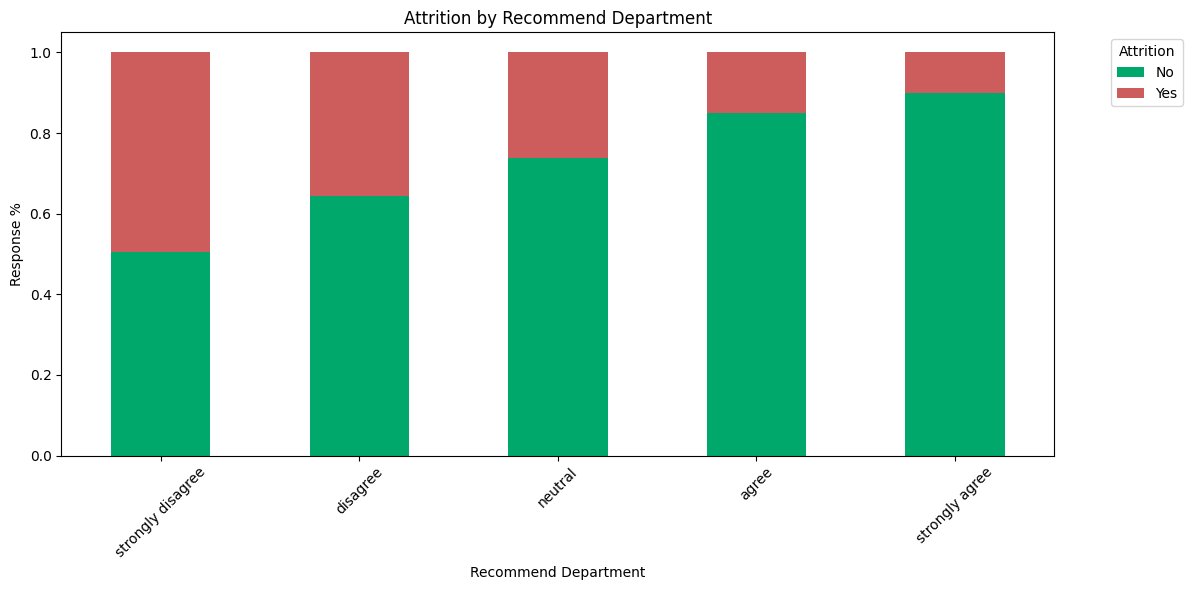

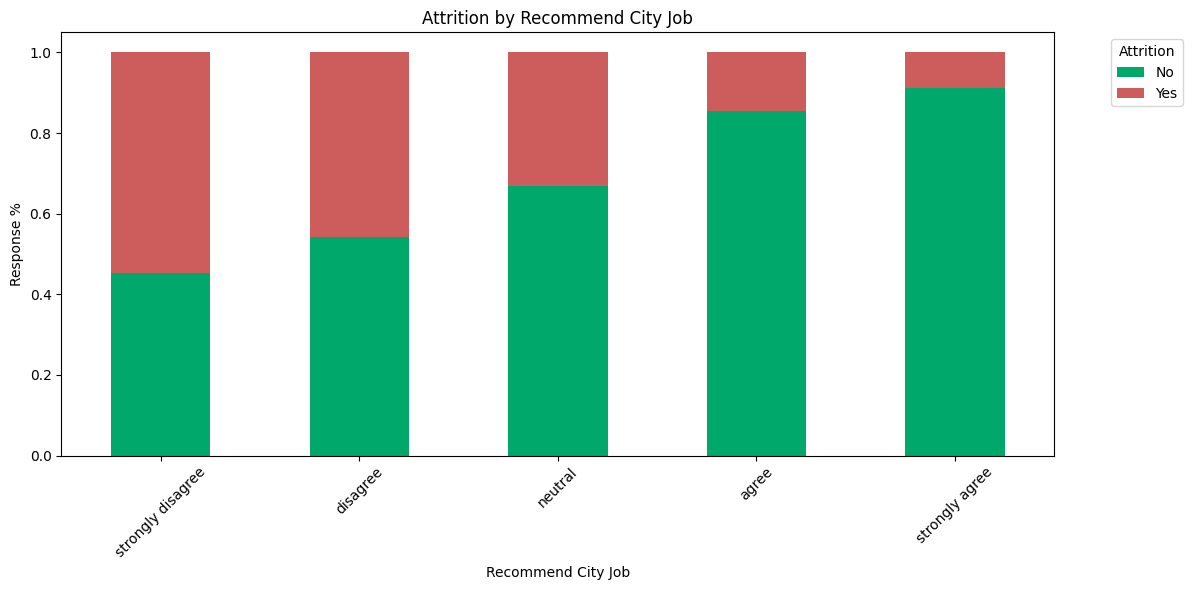

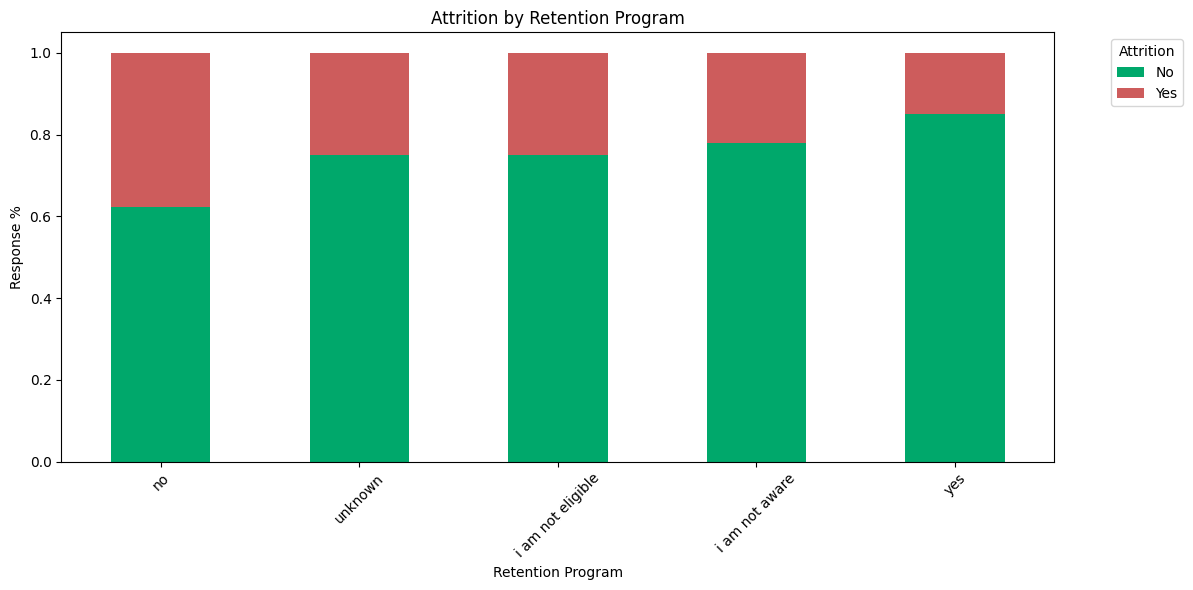

In [44]:
custom_colors = {
    'No': '#00A86B',
    'Yes': '#CD5C5C'
}
ordered_columns = ['No', 'Yes']

# List of columns to iterate over
features_to_plot = [
    'years_worked_for_city',
    'transferred_departments',
    'applied_for_other_job',
    'benefits',
    'career_advancement',
    'public_service_commitment',
    'compensation',
    'fair_treatment',
    'culture',
    'retirement_pension',
    'telework',
    'desire_to_stay_department',
    'desire_to_stay_city_job',
    'work_life_balance',
    'feel_valued',
    'recommend_department',
    'recommend_city_job',
    'retention_program'
]

# Loop through each feature and create the stacked bar plot
for feature in features_to_plot:
    # Crosstab and normalize
    ctab = pd.crosstab(survey[feature], survey['attrition'])
    ctab = ctab.div(ctab.sum(axis=1), axis=0)

    # Ensure columns are ordered for consistent color mapping
    if all(col in ctab.columns for col in ordered_columns):
        ctab = ctab[ordered_columns]
    else:
        continue  # Skip if one of the labels is missing

    # Plot with 'Yes' stacked first (on top)
    ax = ctab.sort_values('Yes', ascending=False).plot(
        kind='bar',
        stacked=True,
        figsize=(12, 6),
        color=[custom_colors[col] for col in ordered_columns]
    )

    # Customize plot
    plt.title(f'Attrition by {feature.replace("_", " ").title()}')
    plt.xlabel(feature.replace("_", " ").title())
    plt.ylabel('Response %')
    plt.xticks(rotation=45)
    plt.legend(title='Attrition', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()




## Build and Run Models
* Logistic Regression
* Random Forest
* Random Forest (GridSearchCV)
* Neural Net (ADAM)
* Neural Net (RMSPROP)
* Neural Net (SGD)


Best Hyperparameters for Random Forest (GridSearchCV):
{'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Best AUC Score: 0.8172

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Model Comparison Summary:
                  Model  Accuracy       AUC  Precision    Recall  F1 Score
0   Logistic Regression  0.820552  0.787216   0.666667  0.418919  0.514523
4     Neural Net (ADAM)  0.808282  0.777268   0.618557  0.405405  0.489796
6      Neural Net (SGD)  0.805215  0.776022   0.617978  0.371622  0.464135
5  Neural Net (RMSPROP)  0.808282  0.771155   0.611650  0.425676  0.501992
2     RF (GridSearchCV)  0.802147  0.770498   0.633803  0.304054  0.410959
1         Random Forest  0.792945  0.756375   0.582278  0.310811  0.405286
3               XGBoost  0.791411  0.750764   0.553571  0.418919  0.476923


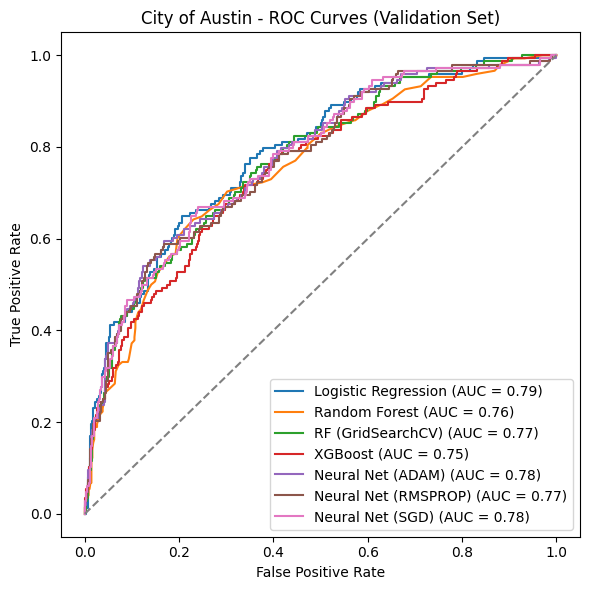

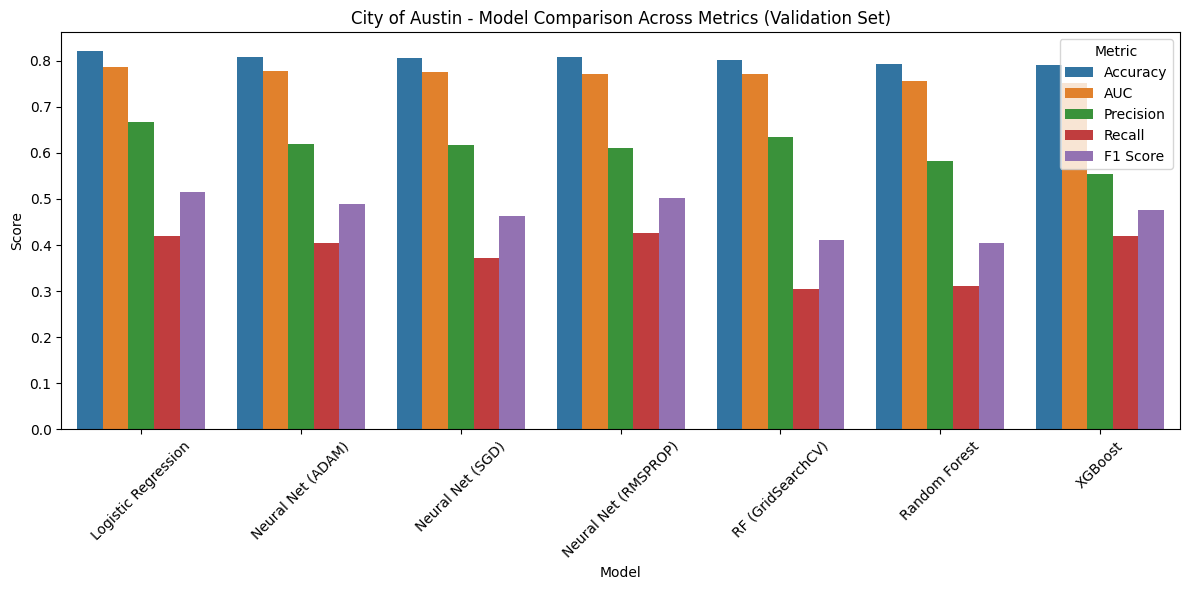

Top 10 Features that Increase Likelihood of Staying:
                                           Feature  Coefficient
91                       retention_program_unknown     0.500715
66                         department_austin water     0.396230
62                        department_austin energy     0.358781
63                 department_austin public health     0.329601
7   applied_for_other_job_within the past 3 months     0.304982
31                    culture_absolutely essential     0.286826
73      department_development services department     0.273294
10                         benefits_very important     0.271901
30                          culture_very important     0.267533
87      department_transportation and public works     0.257573
Top 10 Features that Decrease Likelihood of Staying:
                                              Feature  Coefficient
58                           recommend_city_job_agree    -0.645001
59                  recommend_city_job_strongly agree   

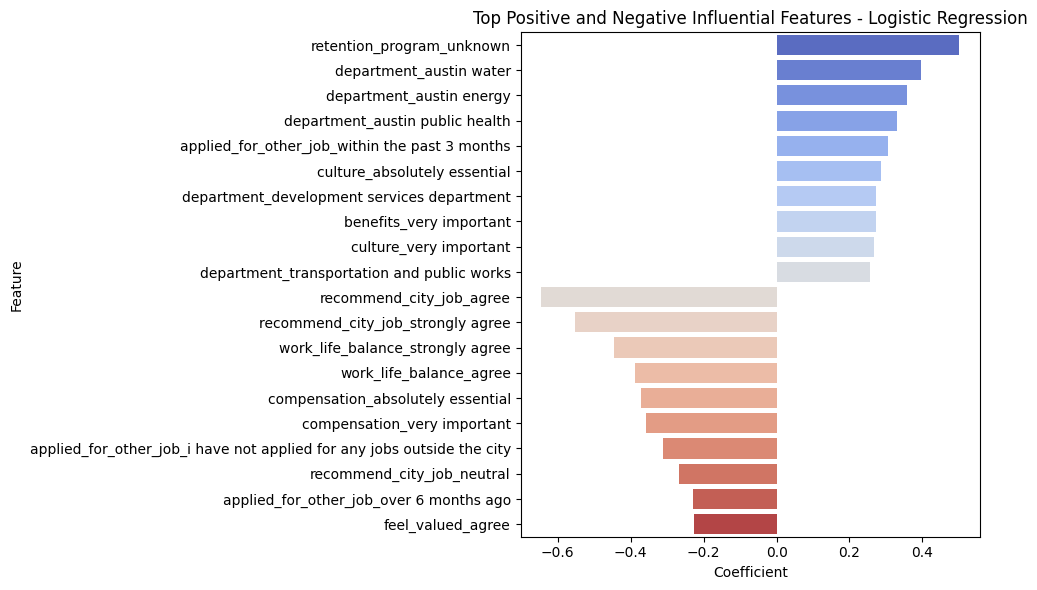

Confusion Matrix for Best Model: Logistic Regression


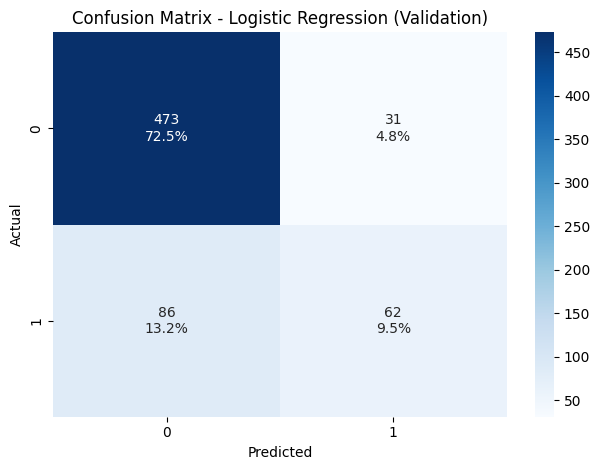

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import backend
import tensorflow as tf

# Set seed
random_seed = 42
np.random.seed(random_seed)
random.seed(random_seed)
tf.random.set_seed(random_seed)

# copy survey dataframe
df = survey.copy()

# Target encoding and preprocessing
df['target'] = df['attrition'].map({'Yes': 1, 'No': 0})
df.drop(columns=['attrition','intention_one_year', 'intention_five_year', 'intention_retire'], inplace=True)
#df.fillna("Unknown", inplace=True)
df_encoded = pd.get_dummies(df.drop(columns=['target']), drop_first=True)
df_encoded['target'] = df['target']

# Features and target
X = df_encoded.drop(columns=['target'])
y = df_encoded['target']

# Train-test-validation split (80% train, 10% validation, 10% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=random_seed)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=random_seed)

# Result storage
eval_results = []
best_model_name = ""

def store_results(model_name, y_true, y_pred, y_prob):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    auc_score = auc(fpr, tpr)
    global best_model_name
    eval_results.append({
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'AUC': auc_score,
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred)
    })
    if not hasattr(store_results, "best_auc") or auc_score > store_results.best_auc:
        store_results.best_auc = auc_score
        best_model_name = model_name

# Scale for models needing it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Logistic Regression
log_model = LogisticRegression(max_iter=1000, random_state=random_seed)
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_val_scaled)
y_prob_log = log_model.predict_proba(X_val_scaled)[:, 1]
store_results("Logistic Regression", y_val, y_pred_log, y_prob_log)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=random_seed)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_val)
y_prob_rf = rf_model.predict_proba(X_val)[:, 1]
store_results("Random Forest", y_val, y_pred_rf, y_prob_rf)

# GridSearchCV for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],            # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],            # Tree depth (None = unlimited)
    'min_samples_split': [2, 5, 10],            # Min samples required to split a node
    'min_samples_leaf': [1, 2, 4],              # Min samples required at a leaf node
    'bootstrap': [True, False]                  # Use bootstrap sampling or not
}
gs_rf = GridSearchCV(RandomForestClassifier(random_state=random_seed), param_grid, cv=3, n_jobs=-1)
gs_rf.fit(X_train, y_train)

# y_pred_gs = gs_rf.predict(X_val)
# y_prob_gs = gs_rf.predict_proba(X_val)[:, 1]
# store_results("RF (GridSearchCV)", y_val, y_pred_gs, y_prob_gs)

# Use the best hyperparameters found by GridSearchCV for Random Forest
best_rf_model = gs_rf.best_estimator_
best_rf_model.fit(X_train, y_train)
y_pred_gs = best_rf_model.predict(X_val)
y_prob_gs = best_rf_model.predict_proba(X_val)[:, 1]
store_results("RF (GridSearchCV)", y_val, y_pred_gs, y_prob_gs)


# GridSearchCV best results
print("\nBest Hyperparameters for Random Forest (GridSearchCV):")
print(gs_rf.best_params_)
print(f"Best AUC Score: {gs_rf.best_score_:.4f}\n")

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='auc', random_state=random_seed)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_val)
y_prob_xgb = xgb_model.predict_proba(X_val)[:, 1]
store_results("XGBoost", y_val, y_pred_xgb, y_prob_xgb)

# Neural Networks
optimizers = ['adam', 'rmsprop', 'sgd']
y_prob_nn_adam, y_prob_nn_rmsprop, y_prob_nn_sgd = None, None, None

for opt in optimizers:
    backend.clear_session()
    np.random.seed(random_seed)
    random.seed(random_seed)
    tf.random.set_seed(random_seed)

    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_initializer=tf.keras.initializers.GlorotUniform(seed=random_seed)),
        Dropout(0.3),
        Dense(64, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=random_seed)),
        Dropout(0.3),
        Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=random_seed))
    ])

    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_val_scaled, y_val), callbacks=[early_stop], verbose=0, shuffle=False)

    y_prob_nn = model.predict(X_val_scaled).ravel()
    y_pred_nn = (y_prob_nn > 0.5).astype(int)
    store_results(f"Neural Net ({opt.upper()})", y_val, y_pred_nn, y_prob_nn)

    if opt == 'adam':
        y_prob_nn_adam = y_prob_nn
    elif opt == 'rmsprop':
        y_prob_nn_rmsprop = y_prob_nn
    elif opt == 'sgd':
        y_prob_nn_sgd = y_prob_nn

# Final comparison
results_df = pd.DataFrame(eval_results).sort_values(by='AUC', ascending=False)
print("Model Comparison Summary:")
print(results_df)

# ROC Curves
plt.figure(figsize=(6, 6))
model_roc_data = [
    ("Logistic Regression", y_val, y_prob_log),
    ("Random Forest", y_val, y_prob_rf),
    ("RF (GridSearchCV)", y_val, y_prob_gs),
    ("XGBoost", y_val, y_prob_xgb),
    ("Neural Net (ADAM)", y_val, y_prob_nn_adam),
    ("Neural Net (RMSPROP)", y_val, y_prob_nn_rmsprop),
    ("Neural Net (SGD)", y_val, y_prob_nn_sgd),
]

for model_name, y_true, y_prob in model_roc_data:
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_true, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("City of Austin - ROC Curves (Validation Set)")
plt.legend()
plt.tight_layout()
plt.show()

# Plotting Comparison
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df.melt(id_vars='Model', var_name='Metric', value_name='Score'),
            x='Model', y='Score', hue='Metric')
plt.title('City of Austin - Model Comparison Across Metrics (Validation Set)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Show feature importances for best model if applicable
if best_model_name == "Random Forest":
    importances = rf_model.feature_importances_
    feature_names = X.columns
    feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)
    print("\nTop 20 Features (Random Forest):")
    print(feat_imp_df.head(20))
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(20))
    plt.title('Top 20 Feature Importances - Random Forest')
    plt.tight_layout()
    plt.show()
elif best_model_name == "RF (GridSearchCV)":
    importances = gs_rf.best_estimator_.feature_importances_
    feature_names = X.columns
    feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)
    print("\nTop 20 Features (RF GridSearchCV):")
    print(feat_imp_df.head(20))
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(20))
    plt.title('Top 20 Feature Importances - RF (GridSearchCV)')
    plt.tight_layout()
    plt.show()
elif best_model_name == "Logistic Regression":
    coef_df = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': log_model.coef_[0]
    })
    coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
    top_positive = coef_df.head(10)
    top_negative = coef_df.tail(10).sort_values(by='Coefficient')

    print("Top 10 Features that Increase Likelihood of Staying:")
    print(top_positive)
    print("Top 10 Features that Decrease Likelihood of Staying:")
    print(top_negative)

    plt.figure(figsize=(10, 6))
    combined_df = pd.concat([top_positive, top_negative])
    sns.barplot(x='Coefficient', y='Feature', data=combined_df, palette='coolwarm')
    plt.title('Top Positive and Negative Influential Features - Logistic Regression')
    plt.tight_layout()
    plt.show()
else:
    print(f"Feature importances not supported for model: {best_model_name}")

# Show confusion matrix for best model
print(f"Confusion Matrix for Best Model: {best_model_name}")
if best_model_name == "Logistic Regression":
    cm = confusion_matrix(y_val, y_pred_log)
elif best_model_name == "Random Forest":
    cm = confusion_matrix(y_val, y_pred_rf)
elif best_model_name == "RF (GridSearchCV)":
    cm = confusion_matrix(y_val, y_pred_gs)
elif "Neural Net" in best_model_name:
    cm = confusion_matrix(y_val, y_pred_nn)
else:
    cm = None

if cm is not None:
    cm_sum = cm.sum()
    labels = np.array([[f"{value}\n{(value / cm_sum * 100):.1f}%" for value in row] for row in cm])
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {best_model_name} (Validation)')
    plt.tight_layout()
    plt.show()

## Balance Class Weights and Tune Parameters


Best Hyperparameters for Random Forest (GridSearchCV):
{'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 325}
Best AUC Score: 0.6578

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Model Comparison Summary:
                  Model  Accuracy       AUC  Precision    Recall  F1 Score
0   Logistic Regression  0.711656  0.785084   0.418699  0.695946  0.522843
4     Neural Net (ADAM)  0.808282  0.777268   0.618557  0.405405  0.489796
6      Neural Net (SGD)  0.805215  0.776022   0.617978  0.371622  0.464135
2     RF (GridSearchCV)  0.725460  0.774440   0.431718  0.662162  0.522667
5  Neural Net (RMSPROP)  0.808282  0.771155   0.611650  0.425676  0.501992
1         Random Forest  0.803681  0.764492   0.647059  0.297297  0.407407
3               XGBoost  0.791411  0.750764   0.553571  0.418919  0.476923


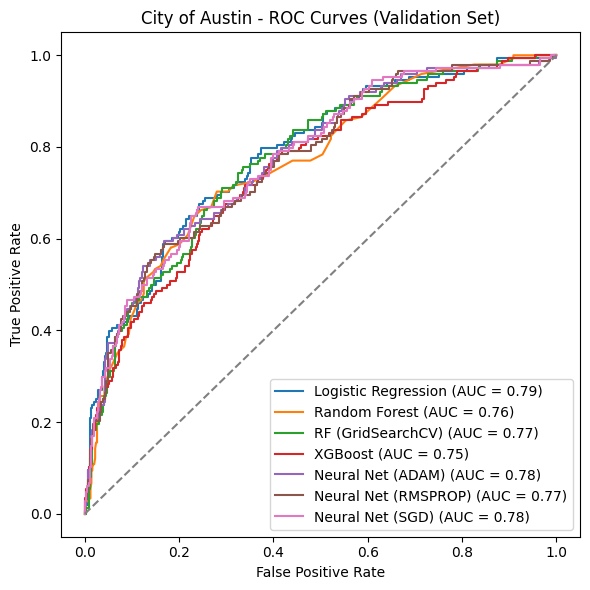

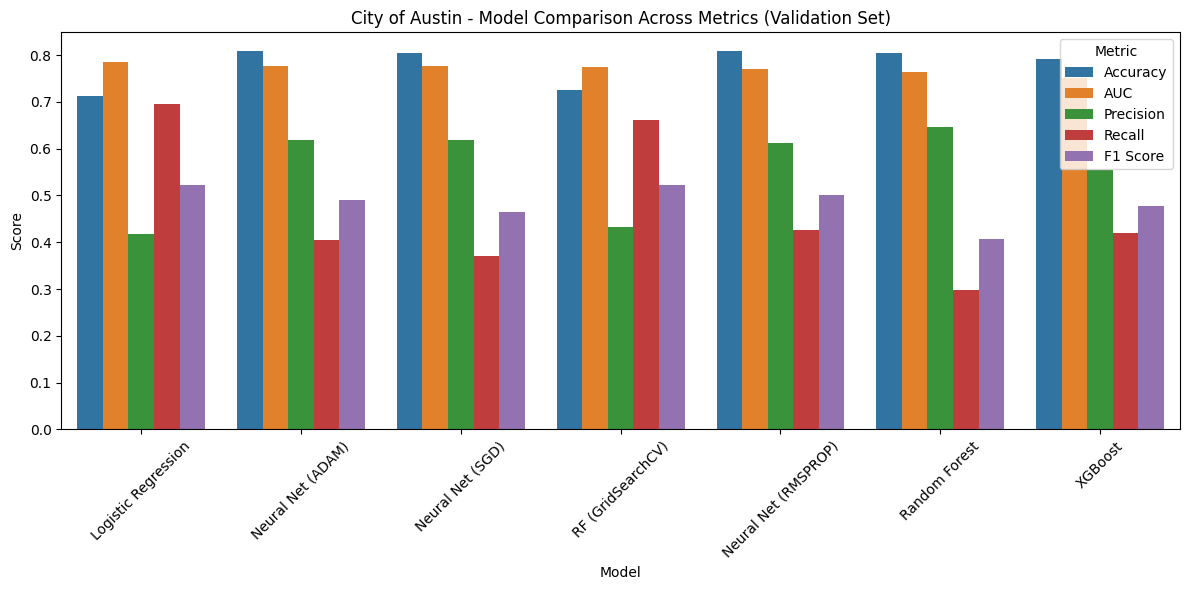

Top 10 Features that Increase Likelihood of Staying:
                                           Feature  Coefficient
91                       retention_program_unknown     0.674983
66                         department_austin water     0.506702
62                        department_austin energy     0.483326
63                 department_austin public health     0.429651
73      department_development services department     0.383422
87      department_transportation and public works     0.329095
7   applied_for_other_job_within the past 3 months     0.306840
64                department_austin public library     0.304402
31                    culture_absolutely essential     0.289308
30                          culture_very important     0.276833
Top 10 Features that Decrease Likelihood of Staying:
                                              Feature  Coefficient
58                           recommend_city_job_agree    -0.631079
59                  recommend_city_job_strongly agree   

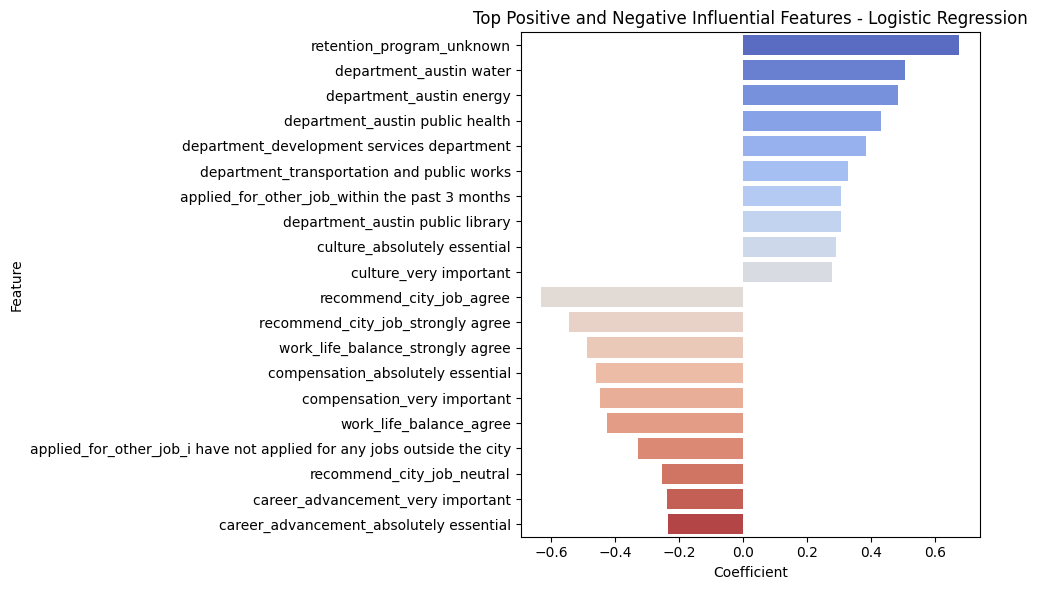

Confusion Matrix for Best Model: Logistic Regression


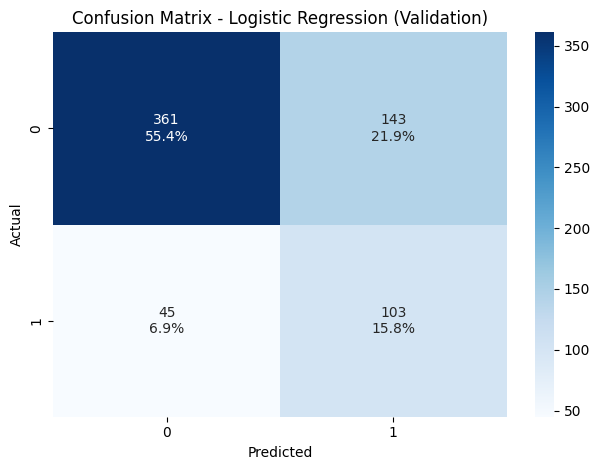

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE  # For SMOTE oversampling
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import backend
from tensorflow.keras.metrics import Recall
import tensorflow as tf

# Set seed
random_seed = 42
np.random.seed(random_seed)
random.seed(random_seed)
tf.random.set_seed(random_seed)

# Copy survey dataframe
df = survey.copy()

# Target encoding and preprocessing
df['target'] = df['attrition'].map({'Yes': 1, 'No': 0})
df.drop(columns=['attrition', 'intention_one_year', 'intention_five_year', 'intention_retire'], inplace=True)
#df.fillna("Unknown", inplace=True)
df_encoded = pd.get_dummies(df.drop(columns=['target']), drop_first=True)
df_encoded['target'] = df['target']

# Features and target
X = df_encoded.drop(columns=['target'])
y = df_encoded['target']

# Train-test-validation split (80% train, 10% validation, 10% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=random_seed)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=random_seed)

# Ensure numeric data for X_train
X_train = X_train.apply(pd.to_numeric, errors='coerce')  # Convert all columns to numeric
X_train = X_train.fillna(0)  # Replace NaNs with 0 or another method of imputation

# Ensure target labels are integers
y_train = y_train.astype(int)  # Convert target labels to integer (0 or 1)

# Result storage
eval_results = []
best_model_name = ""

def store_results(model_name, y_true, y_pred, y_prob):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    auc_score = auc(fpr, tpr)
    global best_model_name
    eval_results.append({
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'AUC': auc_score,
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred)
    })
    if not hasattr(store_results, "best_auc") or auc_score > store_results.best_auc:
        store_results.best_auc = auc_score
        best_model_name = model_name

# Scale for models needing it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Logistic Regression with class_weight='balanced'
log_model = LogisticRegression(max_iter=1000, random_state=random_seed, class_weight='balanced')
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_val_scaled)
y_prob_log = log_model.predict_proba(X_val_scaled)[:, 1]
store_results("Logistic Regression", y_val, y_pred_log, y_prob_log)

# Random Forest with class_weight='balanced'
rf_model = RandomForestClassifier(n_estimators=100, random_state=random_seed, class_weight='balanced')
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_val_scaled)
y_prob_rf = rf_model.predict_proba(X_val_scaled)[:, 1]
store_results("Random Forest", y_val, y_pred_rf, y_prob_rf)

# GridSearchCV for Random Forest with class_weight='balanced'
param_grid = {
    'n_estimators': [325, 350, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [5, 6, 8],
    'bootstrap': [True, False]
}
gs_rf = GridSearchCV(RandomForestClassifier(random_state=random_seed, class_weight='balanced'), param_grid, scoring='recall', cv=3, n_jobs=-1)   # added scoring parameter to focus on recall
gs_rf.fit(X_train_scaled, y_train)

# y_pred_gs = gs_rf.predict(X_val_scaled)
# y_prob_gs = gs_rf.predict_proba(X_val_scaled)[:, 1]
# store_results("RF (GridSearchCV)", y_val, y_pred_gs, y_prob_gs)

# Use the best hyperparameters found by GridSearchCV for Random Forest
best_rf_model = gs_rf.best_estimator_
best_rf_model.fit(X_train, y_train)
y_pred_gs = best_rf_model.predict(X_val)
y_prob_gs = best_rf_model.predict_proba(X_val)[:, 1]
store_results("RF (GridSearchCV)", y_val, y_pred_gs, y_prob_gs)

# GridSearchCV best results
print("\nBest Hyperparameters for Random Forest (GridSearchCV):")
print(gs_rf.best_params_)
print(f"Best AUC Score: {gs_rf.best_score_:.4f}\n")

# XGBoost with scale_pos_weight for class imbalance handling
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='auc',random_state=random_seed, scale_pos_weight=1)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_val_scaled)
y_prob_xgb = xgb_model.predict_proba(X_val_scaled)[:, 1]
store_results("XGBoost", y_val, y_pred_xgb, y_prob_xgb)

# Neural Networks with class_weight='balanced' (Implemented manually during model creation)
optimizers = ['adam', 'rmsprop', 'sgd']
y_prob_nn_adam, y_prob_nn_rmsprop, y_prob_nn_sgd = None, None, None

for opt in optimizers:
    backend.clear_session()
    np.random.seed(random_seed)
    random.seed(random_seed)
    tf.random.set_seed(random_seed)

    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_initializer=tf.keras.initializers.GlorotUniform(seed=random_seed)),
        Dropout(0.3),
        Dense(64, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=random_seed)),
        Dropout(0.3),
        Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=random_seed))
    ])

    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=[Recall()])       # updated metric focus to recall
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_val_scaled, y_val), callbacks=[early_stop], verbose=0, shuffle=False)

    y_prob_nn = model.predict(X_val_scaled).ravel()
    y_pred_nn = (y_prob_nn > 0.5).astype(int)
    store_results(f"Neural Net ({opt.upper()})", y_val, y_pred_nn, y_prob_nn)

    if opt == 'adam':
        y_prob_nn_adam = y_prob_nn
    elif opt == 'rmsprop':
        y_prob_nn_rmsprop = y_prob_nn
    elif opt == 'sgd':
        y_prob_nn_sgd = y_prob_nn

# Final comparison
results_df = pd.DataFrame(eval_results).sort_values(by='AUC', ascending=False)
print("Model Comparison Summary:")
print(results_df)

# ROC Curves
plt.figure(figsize=(6, 6))
model_roc_data = [
    ("Logistic Regression", y_val, y_prob_log),
    ("Random Forest", y_val, y_prob_rf),
    ("RF (GridSearchCV)", y_val, y_prob_gs),
    ("XGBoost", y_val, y_prob_xgb),
    ("Neural Net (ADAM)", y_val, y_prob_nn_adam),
    ("Neural Net (RMSPROP)", y_val, y_prob_nn_rmsprop),
    ("Neural Net (SGD)", y_val, y_prob_nn_sgd),
]

for model_name, y_true, y_prob in model_roc_data:
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_true, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("City of Austin - ROC Curves (Validation Set)")
plt.legend()
plt.tight_layout()
plt.show()

# Plotting Comparison
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df.melt(id_vars='Model', var_name='Metric', value_name='Score'),
            x='Model', y='Score', hue='Metric')
plt.title('City of Austin - Model Comparison Across Metrics (Validation Set)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Show feature importances for best model if applicable
if best_model_name == "Random Forest":
    importances = rf_model.feature_importances_
    feature_names = X.columns
    feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)
    print("\nTop 20 Features (Random Forest):")
    print(feat_imp_df.head(20))
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(20))
    plt.title('Top 20 Feature Importances - Random Forest')
    plt.tight_layout()
    plt.show()
elif best_model_name == "RF (GridSearchCV)":
    importances = gs_rf.best_estimator_.feature_importances_
    feature_names = X.columns
    feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)
    print("\nTop 20 Features (RF GridSearchCV):")
    print(feat_imp_df.head(20))
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(20))
    plt.title('Top 20 Feature Importances - RF (GridSearchCV)')
    plt.tight_layout()
    plt.show()
elif best_model_name == "Logistic Regression":
    coef_df = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': log_model.coef_[0]
    })
    coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
    top_positive = coef_df.head(10)
    top_negative = coef_df.tail(10).sort_values(by='Coefficient')

    print("Top 10 Features that Increase Likelihood of Staying:")
    print(top_positive)
    print("Top 10 Features that Decrease Likelihood of Staying:")
    print(top_negative)

    plt.figure(figsize=(10, 6))
    combined_df = pd.concat([top_positive, top_negative])
    sns.barplot(x='Coefficient', y='Feature', data=combined_df, palette='coolwarm')
    plt.title('Top Positive and Negative Influential Features - Logistic Regression')
    plt.tight_layout()
    plt.show()
else:
    print(f"Feature importances not supported for model: {best_model_name}")

# Show confusion matrix for best model
print(f"Confusion Matrix for Best Model: {best_model_name}")
if best_model_name == "Logistic Regression":
    cm = confusion_matrix(y_val, y_pred_log)
elif best_model_name == "Random Forest":
    cm = confusion_matrix(y_val, y_pred_rf)
elif best_model_name == "RF (GridSearchCV)":
    cm = confusion_matrix(y_val, y_pred_gs)
elif "Neural Net" in best_model_name:
    cm = confusion_matrix(y_val, y_pred_nn)
else:
    cm = None

if cm is not None:
    cm_sum = cm.sum()
    labels = np.array([[f"{value}\n{(value / cm_sum * 100):.1f}%" for value in row] for row in cm])
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {best_model_name} (Validation)')
    plt.tight_layout()
    plt.show()

## See Correlations with Target (Attrition)

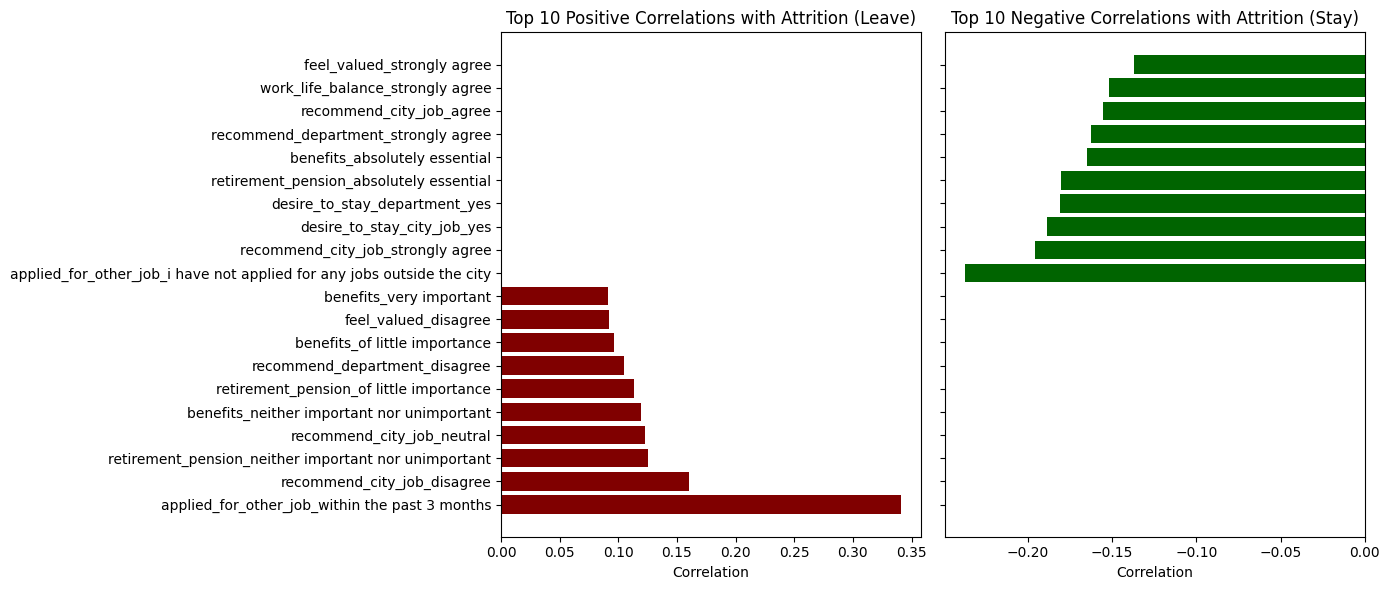

In [49]:
import matplotlib.pyplot as plt

corr_matrix = df_encoded.corr()

# Sort correlations with target
target_corr = corr_matrix['target'].drop('target').sort_values()

# Top 10 negative and positive correlations
top_negative = target_corr.head(10)
top_positive = target_corr.tail(10).sort_values(ascending=False)

# Create side-by-side bar plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot positive correlations
axes[0].barh(top_positive.index, top_positive.values, color='maroon')
axes[0].set_title('Top 10 Positive Correlations with Attrition (Leave)')
axes[0].invert_yaxis()  # Highest at the top
axes[0].set_xlabel('Correlation')

# Plot negative correlations
axes[1].barh(top_negative.index, top_negative.values, color='darkgreen')
axes[1].set_title('Top 10 Negative Correlations with Attrition (Stay)')
axes[1].invert_yaxis()
axes[1].set_xlabel('Correlation')

plt.tight_layout()
plt.show()

## Run Predictions Using the Best Model: Logistic Regression

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84       497
           1       0.52      0.67      0.58       156

    accuracy                           0.77       653
   macro avg       0.70      0.74      0.71       653
weighted avg       0.80      0.77      0.78       653



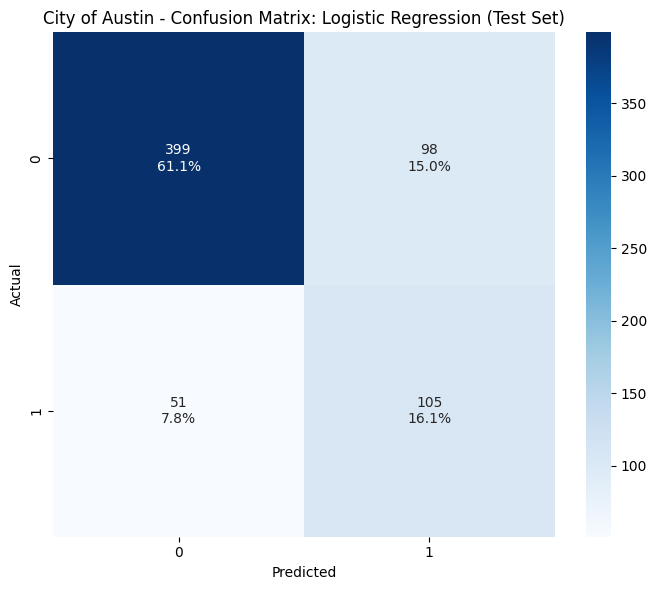

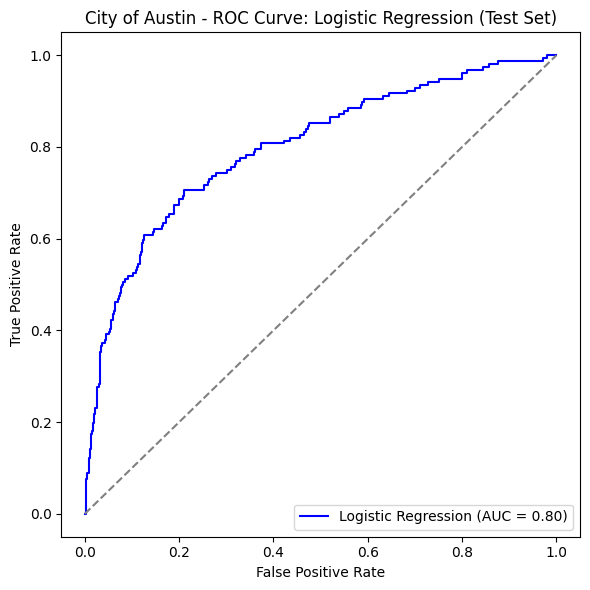

In [50]:
# Scale the test data using the same scaler fitted on the training data
X_test_scaled = scaler.transform(X_test)

# Make predictions on the test data
y_pred_log = log_model.predict(X_test_scaled)
y_prob_log = log_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate model performance
print("Classification Report:")
print(classification_report(y_test, y_pred_log))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_log)
cm_sum = cm.sum()
labels = np.array([[f"{value}\n{(value / cm_sum * 100):.1f}%" for value in row] for row in cm])
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'City of Austin - Confusion Matrix: Logistic Regression (Test Set)')
plt.tight_layout()
plt.show()

# ROC Curve and AUC for Logistic Regression
fpr, tpr, _ = roc_curve(y_test, y_prob_log)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', label=f"Logistic Regression (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('City of Austin - ROC Curve: Logistic Regression (Test Set)')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()